### The notebook every student writes their first year

#### Ok, I added some extra freaky bits -E. 

In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# set some plotting defaults
mpl.rc(('lines', 'axes') , linewidth=2)
mpl.rc(('xtick', 'ytick'), labelsize=15)
mpl.rc(('xtick.major', 'ytick.major'), width=2)
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
# mpl.rcParams["font.family"] = "Times New Roman" 
mpl.rcParams['mathtext.fontset'] = 'stix'
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 18

Here we have the usual cell to control the inputs via commenting out lines.  This is a great trap for our future selves, because we can rerun this cell to with different versions commented out, and then skip to other cells and get inconsistent results. 

In [3]:
# cat = fitsio.FITS('/global/cscratch1/sd/schutt20/y6a2_piff_hsm_x_y6gold20_cuts.fits')
cat = fitsio.FITS('/global/cscratch1/sd/schutt20/y6a2_piff_hsm_all_qacuts_col_fwhm_collated.fits')
# cat = fitsio.read('/global/cscratch1/sd/schutt20/y6a2_piff_hsm_all_qacuts_col_fwhm_collated.fits')
cat[1].upper = True
# cat = cat[1][:]
cat = cat[1]['PSF_FWHM', 'BAND', 'FLUX', 'T_DATA', 'T_MODEL', 'G1_DATA', 'G1_MODEL', 'G2_DATA', 'G2_MODEL',
             'GI_COLOR', 'IZ_COLOR'][:]

In [4]:
print(len(cat))
cat[0:5]

110606507


array([(0.92799997, 'g',   7794.65332031, 0.44524079, 0.45855999, -0.03734855, -0.02376272, 0.02254367, 0.04989601, 1.35552323, -9999.),
       (0.92799997, 'g', 163307.578125  , 0.45232894, 0.45290593, -0.02228521, -0.02006344, 0.04734806, 0.04631565, 0.64126605, -9999.),
       (0.92799997, 'g',  12456.45019531, 0.44697231, 0.45400421, -0.01192299, -0.01721019, 0.04562568, 0.04801583, 2.20257092, -9999.),
       (0.92799997, 'g',  41958.36328125, 0.44322597, 0.44973946, -0.01817188, -0.01581417, 0.03835294, 0.03895866, 0.98370016, -9999.),
       (0.92799997, 'g',  46038.83203125, 0.45808674, 0.45619998, -0.01717688, -0.02042059, 0.05184885, 0.04963874, 0.98827869, -9999.)],
      dtype=[('PSF_FWHM', '>f8'), ('BAND', '<U20'), ('FLUX', '>f8'), ('T_DATA', '>f8'), ('T_MODEL', '>f8'), ('G1_DATA', '>f8'), ('G1_MODEL', '>f8'), ('G2_DATA', '>f8'), ('G2_MODEL', '>f8'), ('GI_COLOR', '>f8'), ('IZ_COLOR', '>f8')])

This next cell is pretty cool, it is commented out, but the value of '77978603' was cached the first time I ran it

In [6]:
# optional cut on Gaia matches
# cat = cat[cat['BDF_MAG_G_CORRECTED'] > 0]
# print(len(cat))

77978603


Here we have a pretty standard cell where we correct the input values.   This is a really great programming trap for our future selves because at some point we are gonna switch to new versions of the input file with the correct input values.  

In [4]:
#correct for Piff returning sigma for T
cat['T_DATA'] = 2*cat['T_DATA']**2
cat['T_MODEL'] = 2*cat['T_MODEL']**2

### General catalog statistics

(note that we are defining 'bands' here, by we are gonna be redefining it a number of times elsewhere in the NB)

In [6]:
bands = 'grizY'
for band in bands:
    print('{}-band star count: {}'.format(band, len(cat[cat['BAND'] == band])))

g-band star count: 26878488
r-band star count: 28156313
i-band star count: 27147571
z-band star count: 28424135
Y-band star count: 0


In [8]:
# optional cut on size
# cat = cat[cat['T_DATA'] < 1.5]
# for band in bands:
#     print('{}-band star count: {}'.format(band, len(cat[cat['BAND'] == band])))

g-band star count: 19866316
r-band star count: 18437112
i-band star count: 17148118
z-band star count: 18673980
Y-band star count: 0


In [5]:
bands = 'griz'

In [8]:
print('Number of exposures: {}'.format(len(np.unique(cat['EXPNUM']))))

Number of exposures: 80488


In [9]:
u_exp_ccd, nstars = np.unique(np.stack((cat['EXPNUM'], cat['CCDNUM']), axis=1), axis=0, return_counts=True)

In [11]:
print('Number of unique exposure, CCD pairs: {}'.format(len(u_exp_ccd)))

Number of unique exposure, CCD pairs: 4834591


In [12]:
print(u_exp_ccd); print(nstars)

[[226648      1]
 [226648      2]
 [226648      3]
 ...
 [815094     59]
 [815094     60]
 [815094     62]]
[10 15 14 ... 64 51 65]


Text(0.5, 0, 'Nstars / CCD')

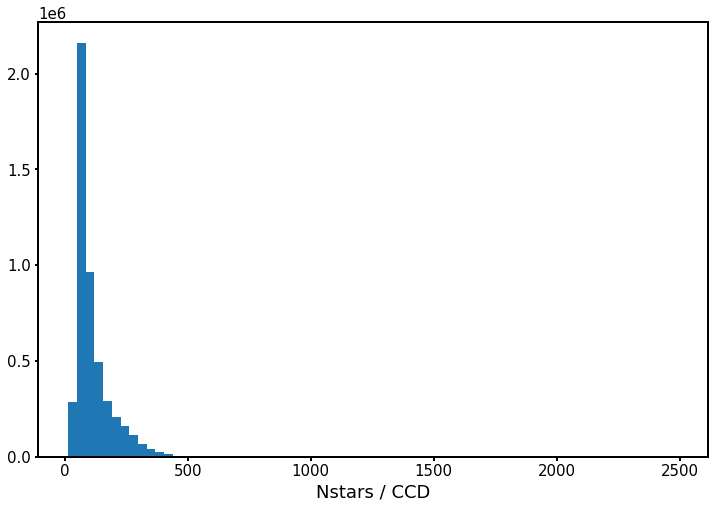

In [13]:
#rough histogram of nstars/CCD
fig = plt.figure(figsize=(12, 8))
plt.hist(nstars*5, bins=70) #these are the 20% reserve stars, so multiply by 5
plt.xlabel('Nstars / CCD')

In [14]:
print(min(nstars), max(nstars))

3 498


RA:  -2.2516589422471713 362.16090357839727 DEC:  -68.33683089054006 6.0687294201489035


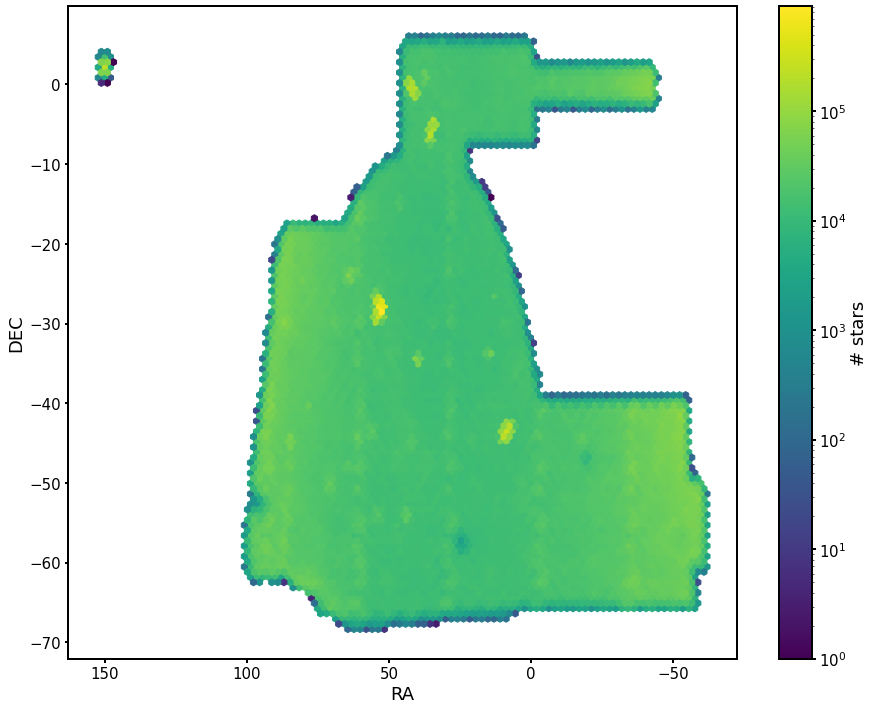

In [8]:
#plot footprint
print('RA: ', min(cat['RA']), max(cat['RA']), 
      'DEC: ', min(cat['DEC']), max(cat['DEC']))

fig, ax = plt.subplots(1,1, figsize=(15,12))
#plot g-r_color vs g_mag 2d histogram with log density
catra = cat['RA']
catra[catra > 180.] -= 360.
im = ax.hexbin(catra, cat['DEC'], bins='log', mincnt=1)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('# stars')
ax.invert_xaxis()
#ax.set_ylim(cat['dec'].min(), cat['dec'].max())
plt.show()

In [ ]:
# bands = 'griz'
# banddict = {}
# for band in bands:
#     banddict[band] = cat[cat['BAND'] == band]

KeyboardInterrupt: 

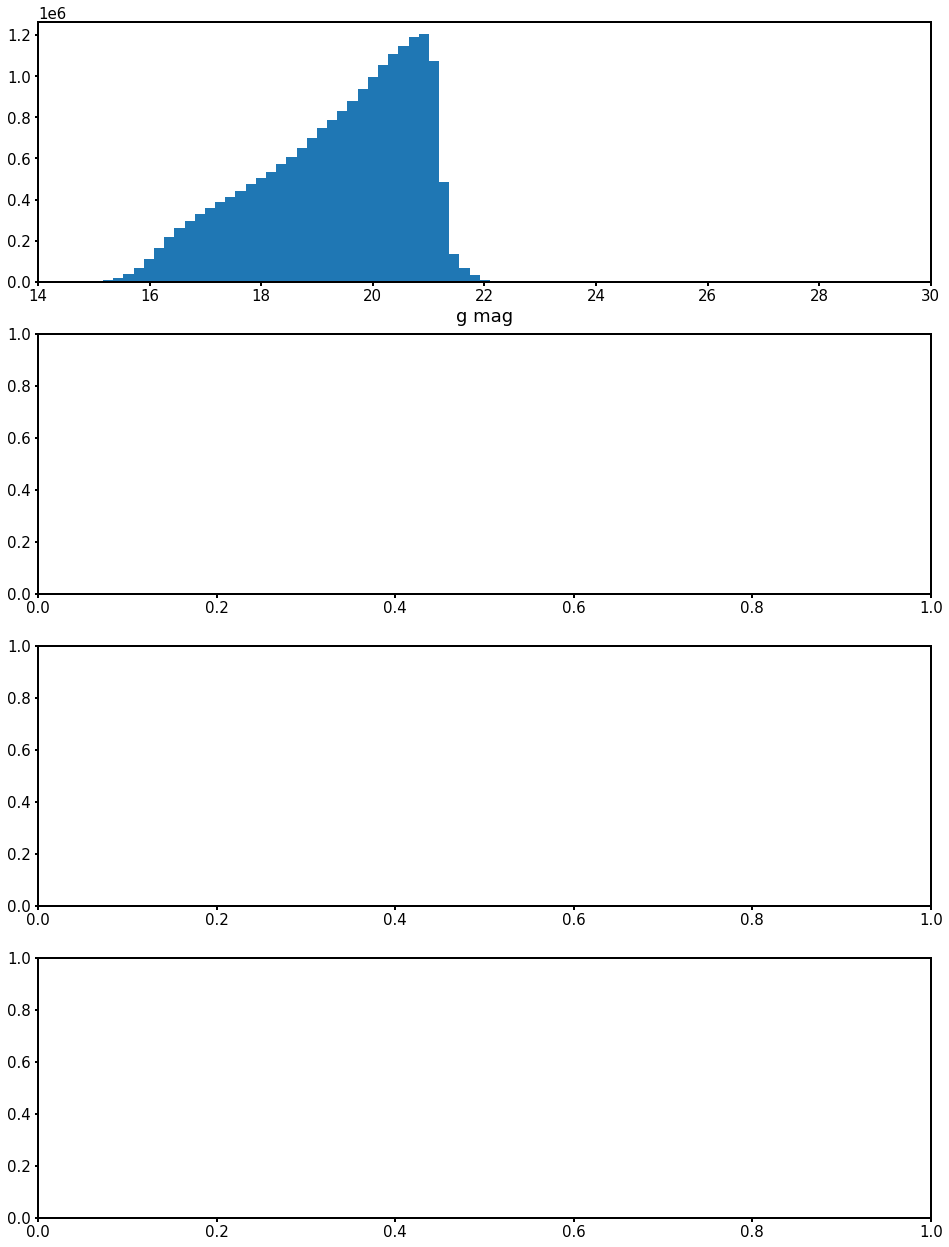

In [10]:
make_figrure_and_subplots

/tmp/ipykernel_54706/2342909619.py:6: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(flux)


g 12.727067387968859 22.888894283928387
r 12.91205581385308 22.078130476517522
i 13.178262613165277 21.98646328689256
z 13.046709160193558 21.645022196193537


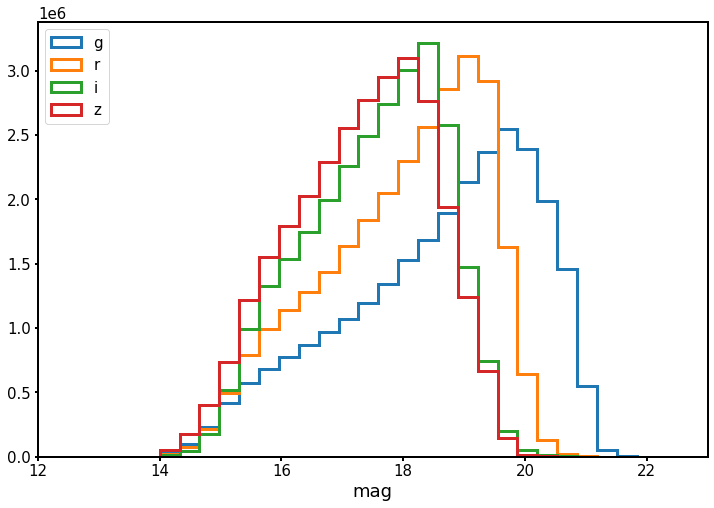

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
bins = np.linspace(14, 30, 50)
for i, band in enumerate(bands):
    flux = cat['FLUX'][cat['BAND'] == band]
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(flux)
    print(band, min(mag), max(mag))
    ax.hist(mag, bins=bins, histtype='step', label=band, lw=3)
    ax.legend()
    ax.set_xlim(12, 23)
    ax.set_xlabel('mag')

In [18]:
for band in bands:
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    print(min(chist), max(chist))

1.2610040357685648e-05 3.4999969005584717
7.189989901235094e-06 3.4999969005584717
3.891728283633711e-06 3.4999969005584717
2.000808585478353e-08 0.6999996900558472


In [10]:
# 110606507 - len(cat)

36007492

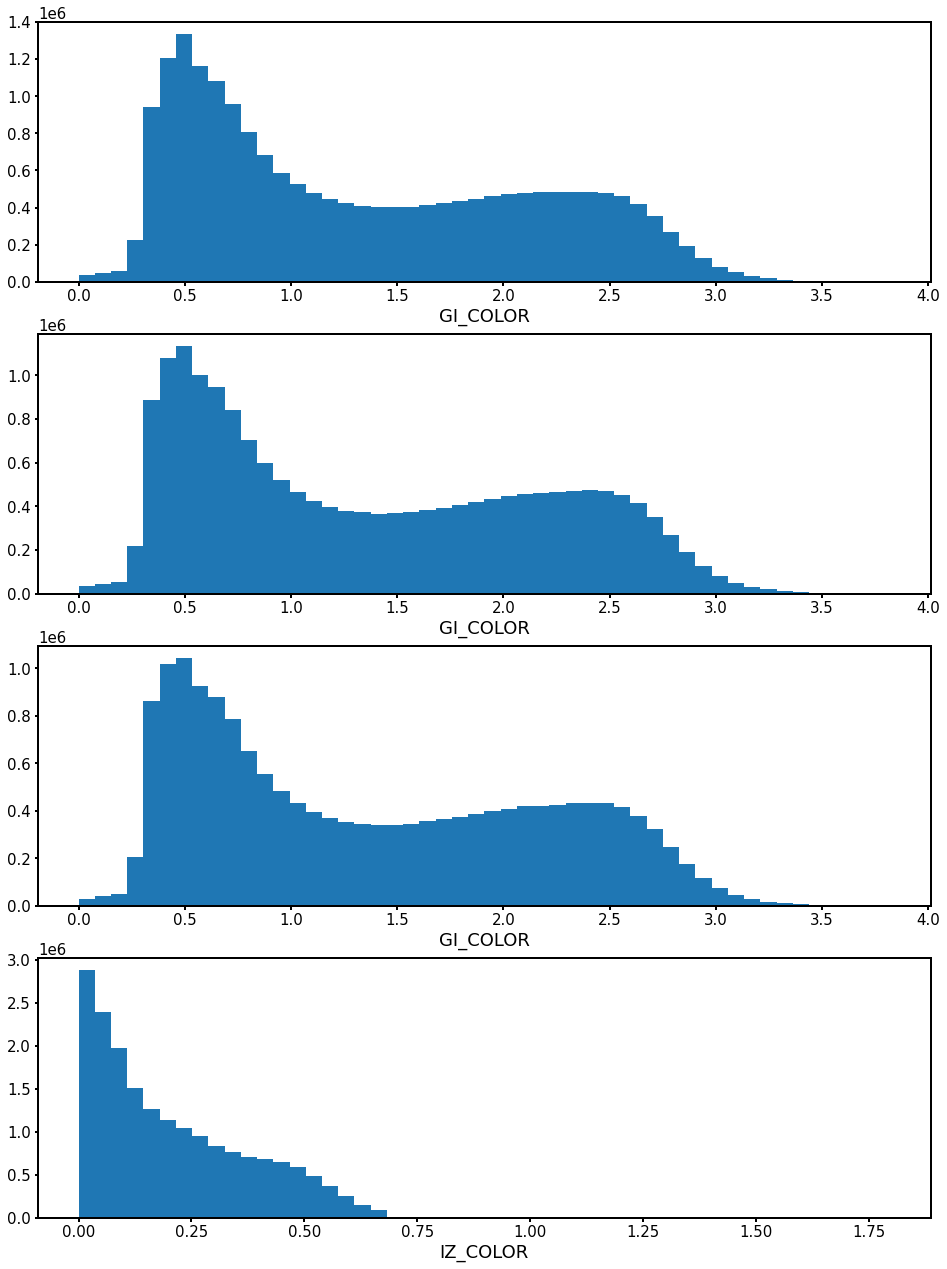

In [11]:
#plot color distribution per band
# fig, axs = plt.subplots(4, 1, figsize=(16,22))
# for i, band in enumerate(bands):
#     if band == 'z':
#         color = 'IZ_COLOR'
#     else:
#         color = 'GI_COLOR'
#     chist = cat[color][cat['BAND'] == band]
#     ax = axs[i]
#     ax.hist(chist, bins=50)
#     ax.set_xlabel(color)

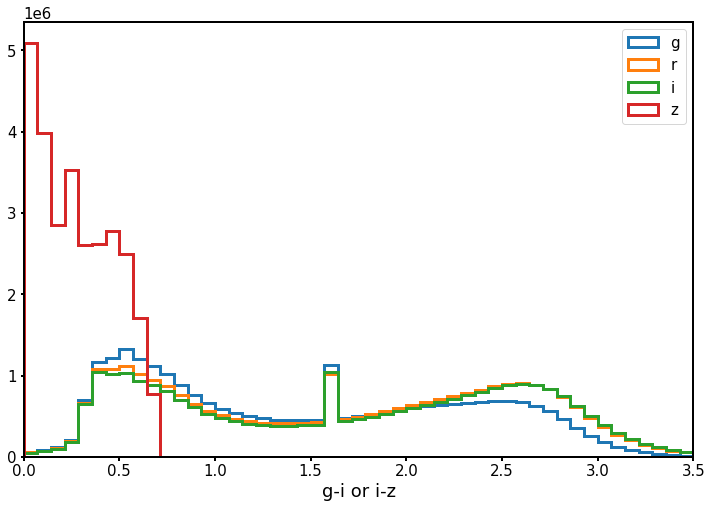

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
bins = np.linspace(0, 3.5, 50)
for i, band in enumerate(bands):
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    ax.hist(chist, bins=bins, histtype='step', label=band, lw=3)
    ax.legend()
    ax.set_xlim(0, 3.5)
    ax.set_xlabel('g-i or i-z')

/tmp/ipykernel_54706/3135933908.py:14: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(flux)


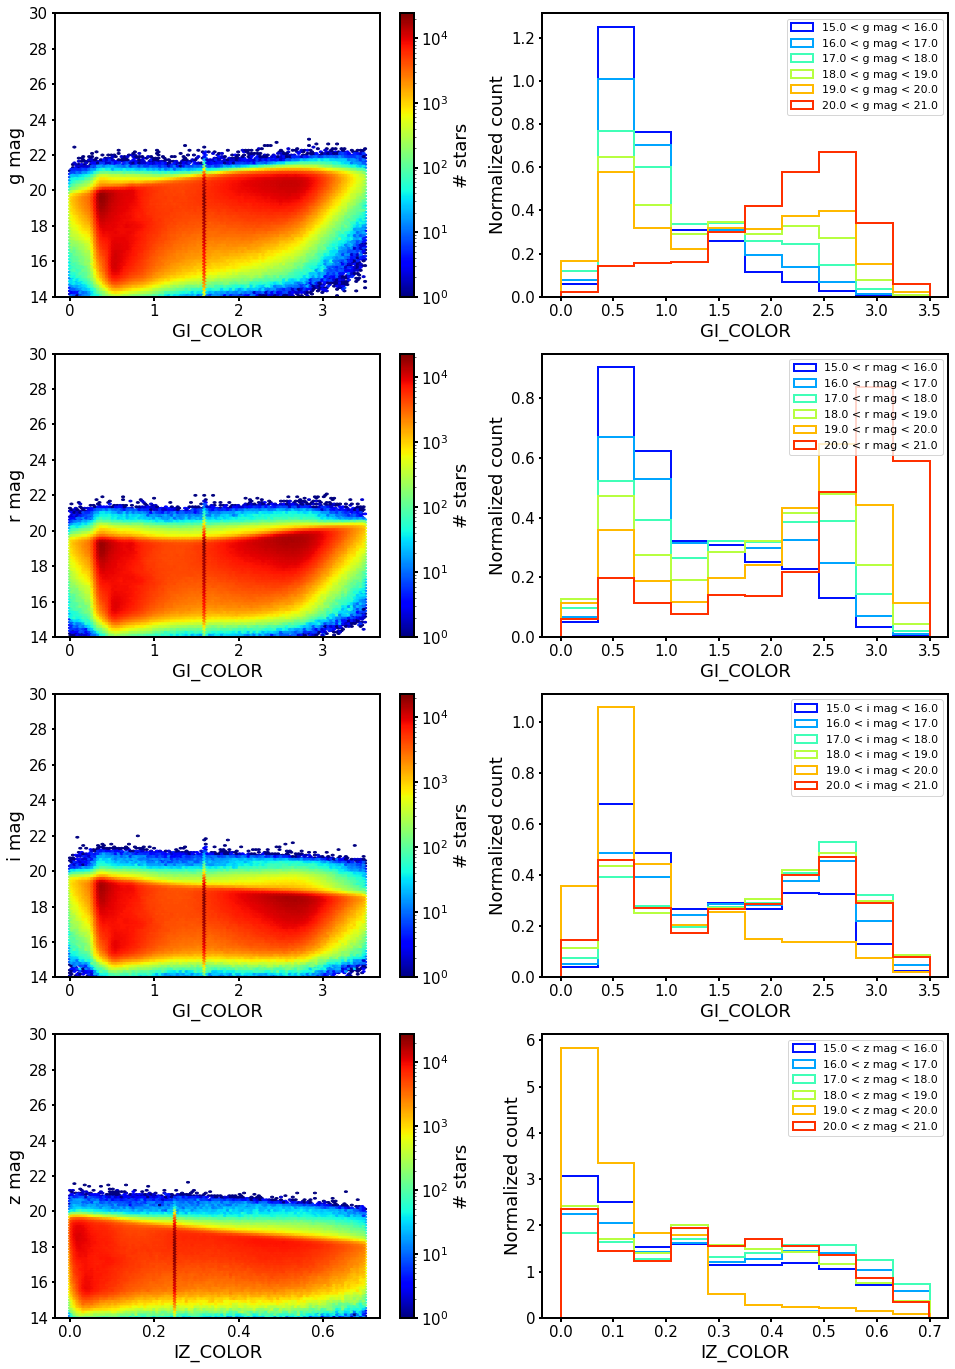

In [23]:
#plot color vs mag per band
fig, axs = plt.subplots(4,2, figsize=(16,24))
cmap = plt.get_cmap('jet')
for i, band in enumerate(bands):
    ax = axs[i][0]
    #plot g-r_color vs g_mag 2d histogram with log density
    if band == 'z':
        color = 'IZ_COLOR'
    else:
        color = 'GI_COLOR'
    chist = cat[color][cat['BAND'] == band]
    flux = cat['FLUX'][cat['BAND'] == band]
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(flux)
    im = ax.hexbin(chist, mag, bins='log', mincnt=1, cmap=cmap)
    ax.set_ylim(14,30)
    ax.set_ylabel('{} mag'.format(band))
    ax.set_xlabel(color)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('# stars')
    
    #plot color histogram in mag slices
    ax = axs[i][1]
    nbins = 7
    cbins = np.linspace(15., 21., nbins)
    for i in range(len(cbins)-1):
        k = i+1
        mask = np.logical_and(np.greater_equal(mag, cbins[i]),
                              np.less(mag, cbins[k]))
        color_slice = chist[mask]
        loedge = '{0:3.1f}'.format(cbins[i])
        hiedge = '{0:3.1f}'.format(cbins[k])
        ax.hist(color_slice, density=True, 
                    label='{} < {} mag < {}'.format(loedge, band, hiedge),
                    histtype='step', lw=2, color=cmap(k/nbins))
        ax.legend(ncol=1, fontsize=11)
        ax.set_xlabel(color)
        ax.set_ylabel('Normalized count')

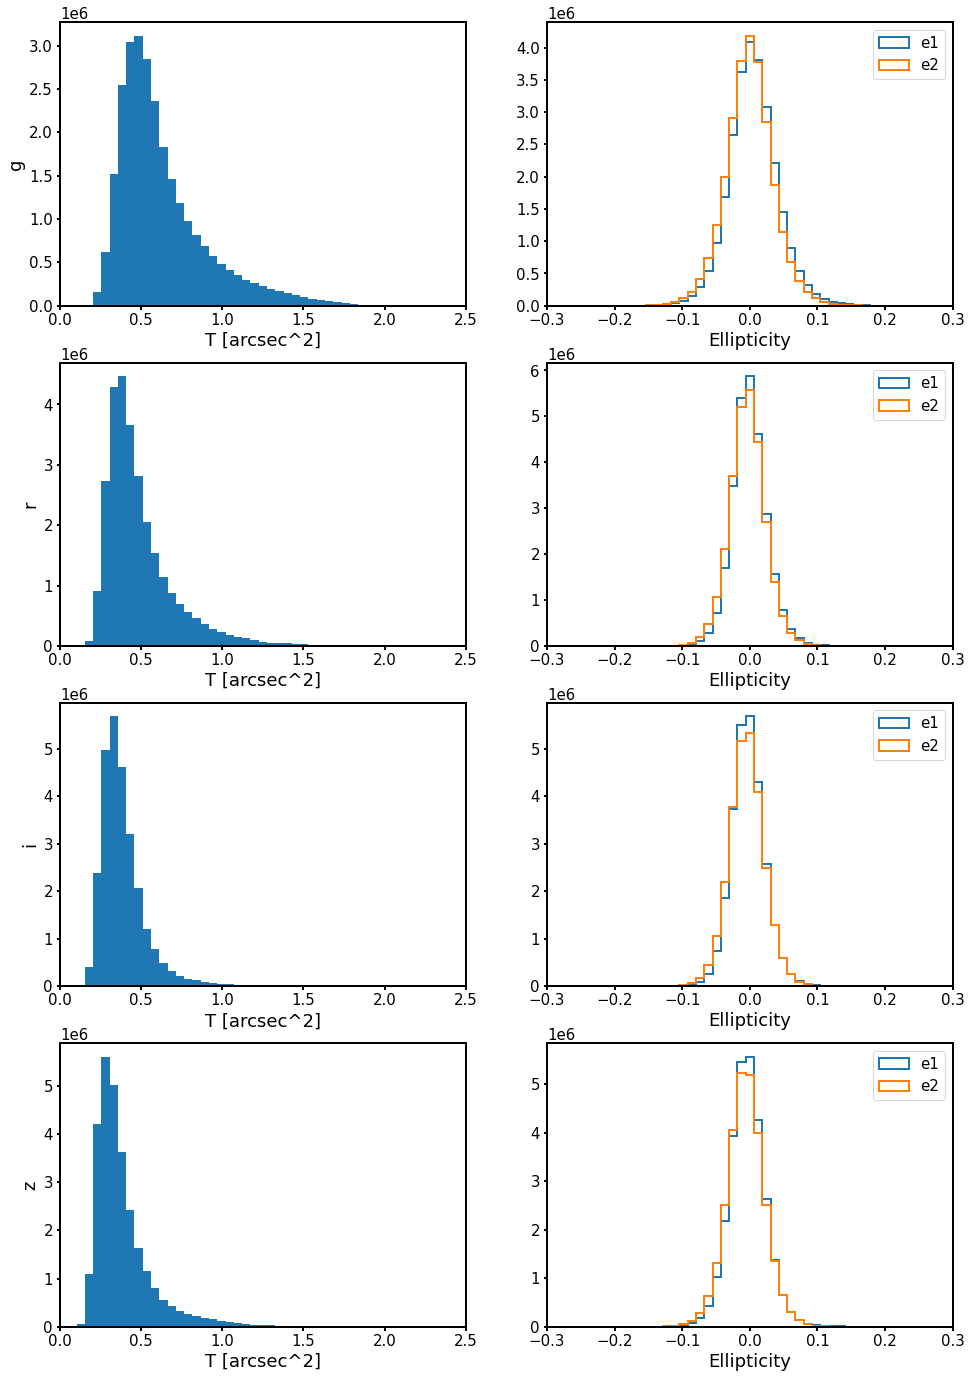

In [24]:
fig, axs = plt.subplots(4,2, figsize=(16,24))
for i, band in enumerate(bands):
    ax = axs[i][0]
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    ax.hist(size, bins=np.linspace(0, 2.5, 50))
    ax.set_xlim(0, 2.5)
    ax.set_xlabel('T [arcsec^2]')
    ax.set_ylabel(band)
    
    #plot e1 and e2 histograms
    ax = axs[i][1]
    e1 = cat['G1_DATA'][cat['BAND'] == band]
    e2 = cat['G2_DATA'][cat['BAND'] == band]
    ax.hist(e1, bins=np.linspace(-0.3, 0.3, 50), histtype='step', label='e1', lw=2)
    ax.hist(e2, bins=np.linspace(-0.3, 0.3, 50), histtype='step', label='e2', lw=2)
    ax.set_xlim(-0.3, 0.3)
    ax.legend()
    ax.set_xlabel('Ellipticity')

g mean, median, std: (0.631612634002589, 0.5532082857691931, 0.28188184934038313)
r mean, median, std: (0.4902085344450777, 0.42880685214170855, 0.22089285467443237)
z mean, median, std: (0.3896709533414371, 0.3373685277809934, 0.18938248270030217)


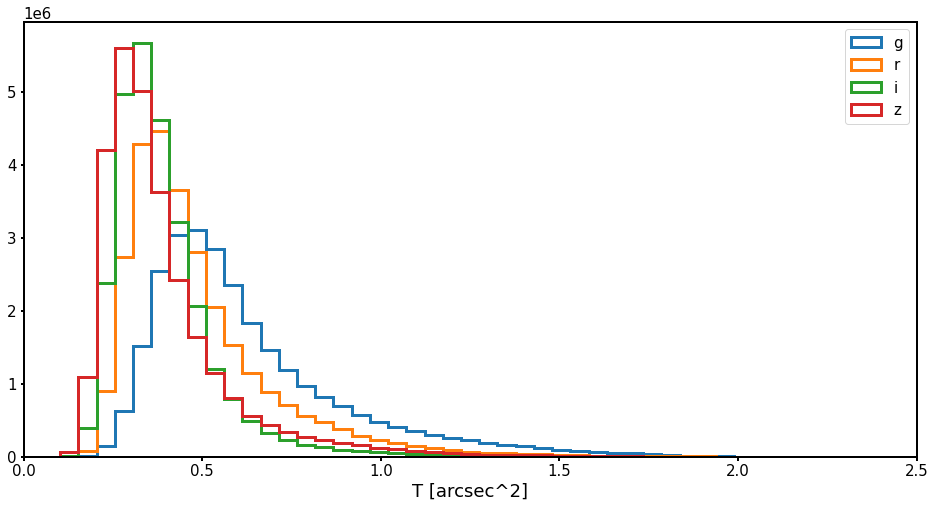

In [26]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))
    ax.hist(size, np.linspace(0, 2.5, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 2.5)
    ax.legend()
    ax.set_xlabel('T [arcsec^2]')

g mean, median, std: (0.631612634002589, 0.5532082857691931, 0.28188184934038313)
r mean, median, std: (0.4902085344450777, 0.42880685214170855, 0.22089285467443237)
i mean, median, std: (0.3922571686335401, 0.3585424705333848, 0.1535047215343758)
z mean, median, std: (0.3896709533414371, 0.3373685277809934, 0.18938248270030217)


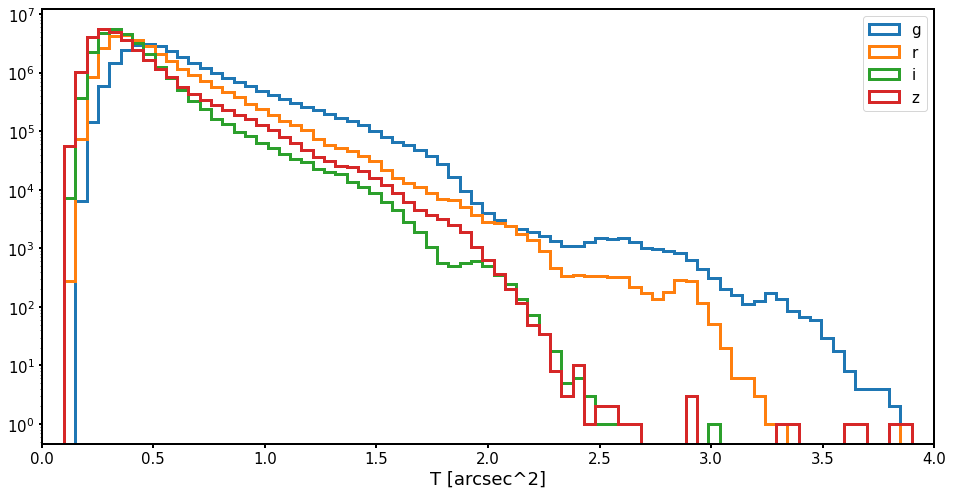

In [7]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['T_DATA'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))
    ax.hist(size, np.linspace(0, 4.0, 80), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 4.0)
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel('T [arcsec^2]')

In [30]:
#plot color vs mag per band on one ax
for i, band in enumerate(bands):
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    print('{} mean, median, std: {}'.format(band, (np.mean(size),
                                                   np.median(size),
                                                   np.std(size))))

g mean, median, std: (1.1675663773089189, 1.1119999885559082, 0.2354682994458841)
r mean, median, std: (1.0248871864922608, 0.9760000109672546, 0.20272992785221292)
i mean, median, std: (0.9213076150987255, 0.8930000066757202, 0.15579719298022932)
z mean, median, std: (0.905920370140829, 0.8610000014305115, 0.19027744652516498)


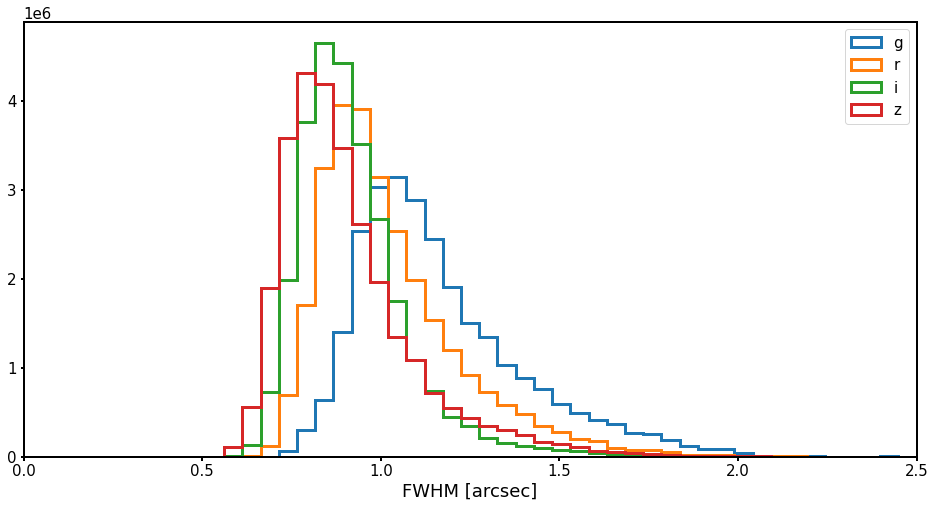

In [32]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    ax.hist(size, np.linspace(0, 2.5, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0, 2.5)
    ax.legend()
    ax.set_xlabel('Exposure median FWHM [arcsec]')

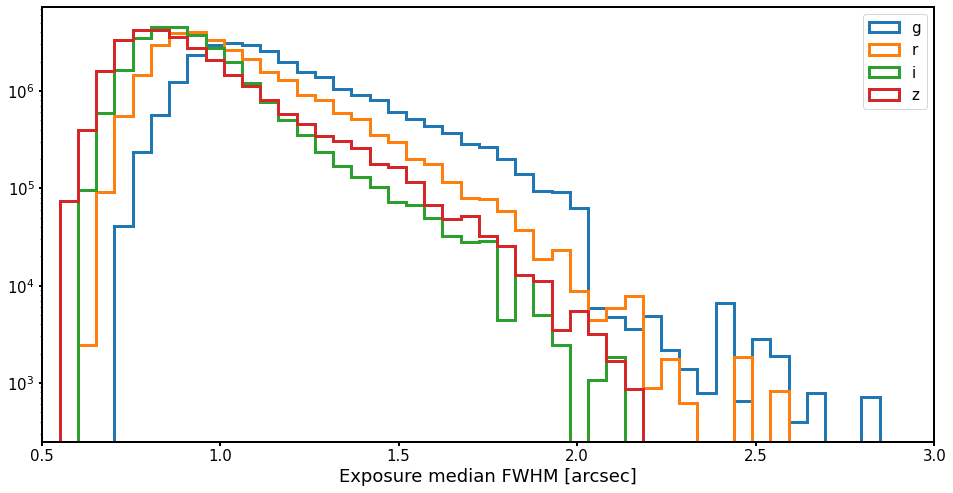

In [36]:
#plot color vs mag per band on one ax
fig, axs = plt.subplots(1,1, figsize=(16,8))
for i, band in enumerate(bands):
    ax = axs
    # plot size histogram
    size = cat['PSF_FWHM'][cat['BAND'] == band]
    ax.hist(size, np.linspace(0.5, 3.0, 50), label=band, histtype='step', lw=3)
    ax.set_xlim(0.5, 3.0)
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel('Exposure median FWHM [arcsec]')

/tmp/ipykernel_14299/469431833.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
/tmp/ipykernel_14299/469431833.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
/tmp/ipykernel_14299/469431833.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log

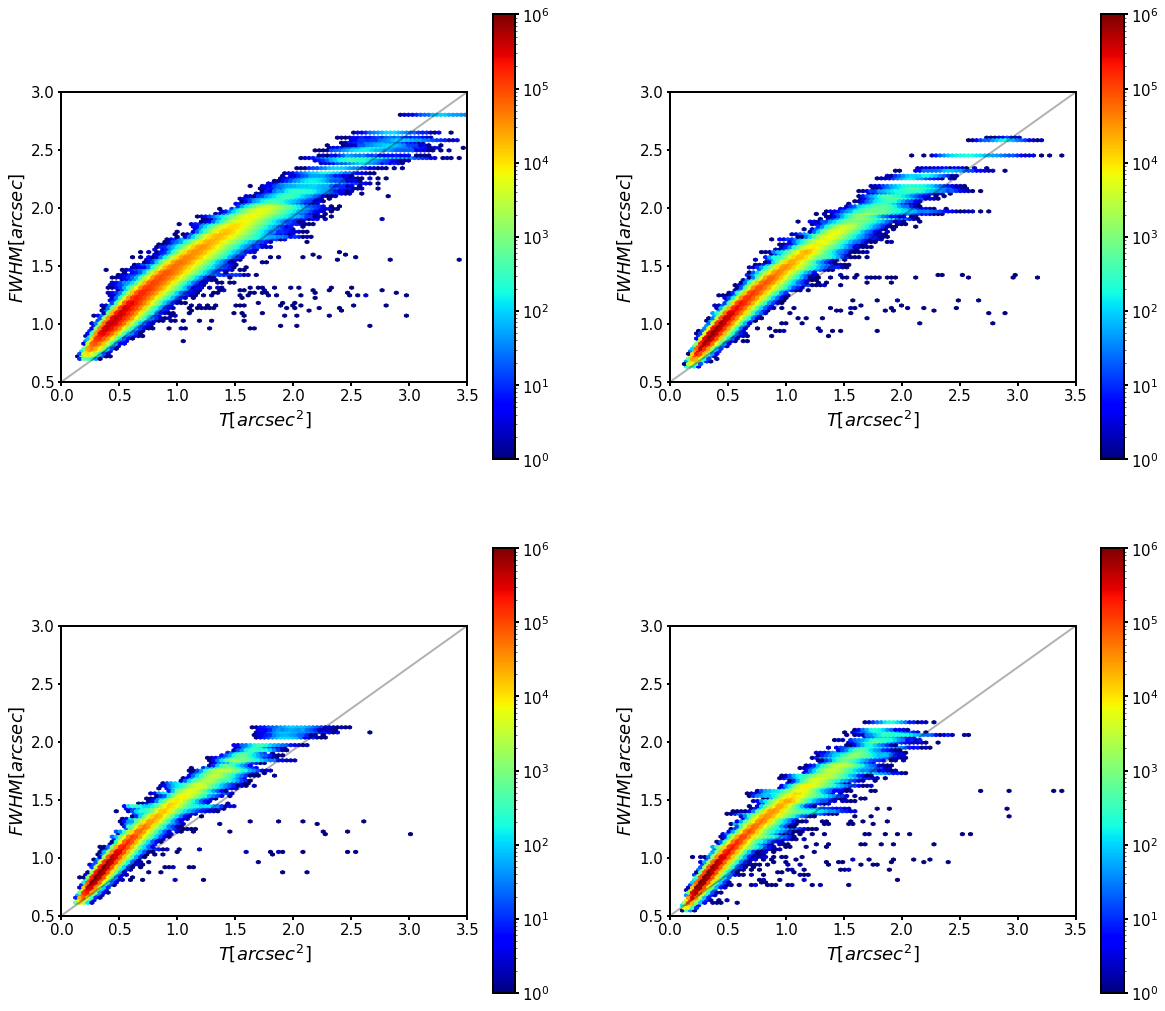

In [6]:
##plot T vs. FWHM correlation
fig, axs = plt.subplots(2,2, figsize=(20,18))
for i, band in enumerate('griz'):
    # <T> vs (color, mag)
    ax = axs[int(i/2)][i%2]
    # if band == 'z':
    #     color = 'IZ_COLOR'
    #     cmax = 0.7
    # else:
    #     color = 'GI_COLOR'
    #     cmax = 3.5
    data = cat[cat['BAND'] == band]
    tsize = data['T_DATA']
    fwhm = data['PSF_FWHM']
    
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
                   vmin=1., vmax=1e6)
    ax.plot(np.linspace(0,3.5,2),np.linspace(0.5,3.,2), c='k', alpha=0.3)
    # ax.set_aspect('equal')
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0.5, 3.0)
    ax.set_xlabel(r'$T [arcsec^2]$')
    ax.set_ylabel(r'$FWHM [arcsec]$')
    cbar = plt.colorbar(im, ax=ax)
    #cbar.set_label(r'$\left<T_{\mathrm{PSF}}\right>$')


/tmp/ipykernel_10705/791657528.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
/tmp/ipykernel_10705/791657528.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
/tmp/ipykernel_10705/791657528.py:17: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log

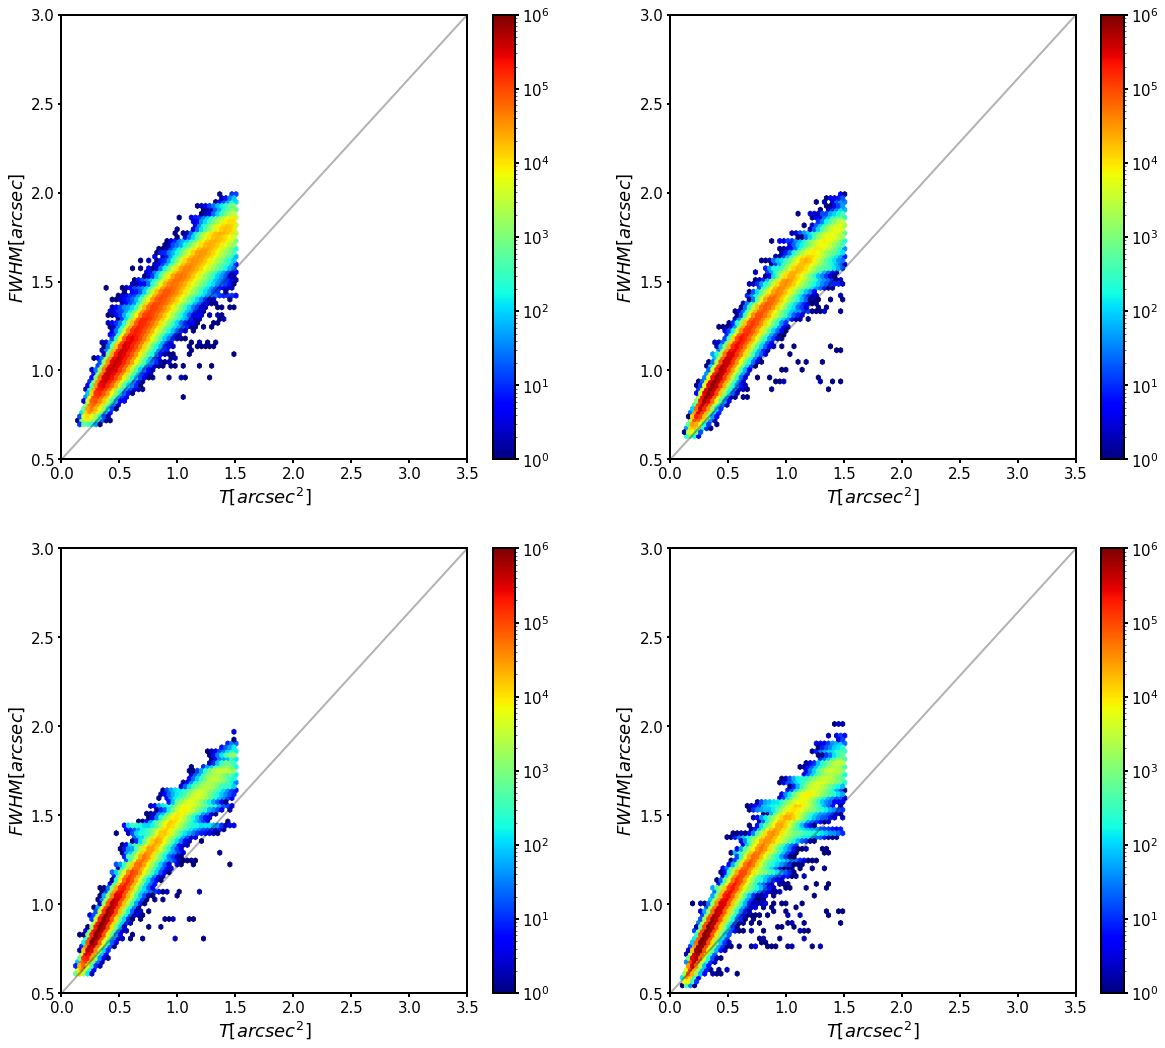

In [10]:
##plot T vs. FWHM correlation
fig, axs = plt.subplots(2,2, figsize=(20,18))
for i, band in enumerate('griz'):
    # <T> vs (color, mag)
    ax = axs[int(i/2)][i%2]
    # if band == 'z':
    #     color = 'IZ_COLOR'
    #     cmax = 0.7
    # else:
    #     color = 'GI_COLOR'
    #     cmax = 3.5
    data = cat[cat['BAND'] == band]
    tsize = data['T_DATA']
    fwhm = data['PSF_FWHM']
    
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(tsize, fwhm, mincnt=1, bins='log', cmap=cmap, extent=(0, 3.5, 0.5, 3.0),
                   vmin=1., vmax=1e6)
    ax.plot(np.linspace(0,3.5,2),np.linspace(0.5,3.,2), c='k', alpha=0.3)
    # ax.set_aspect('equal')
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0.5, 3.0)
    ax.set_xlabel(r'$T [arcsec^2]$')
    ax.set_ylabel(r'$FWHM [arcsec]$')
    cbar = plt.colorbar(im, ax=ax)
    #cbar.set_label(r'$\left<T_{\mathrm{PSF}}\right>$')


In [6]:
def bin_by_color(m, dT, ax, cmin=0., cmax=3.5, tmin=0., tmax=1., min_mused=None):

    mag_bins = np.linspace(cmin, cmax, 30)
    print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_dT[i-1] = 0.
            bin_dT_err[i-1] = 0.
    
    ax.set_ylim(tmin, tmax)
    #ax.plot([cmin,cmax], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='b', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$\left<T_{data}\right> \quad({\rm arcsec}^2)$')
    ax.set_xlabel(color)
    plt.tight_layout()

col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]
bin_dT =  [0.6275151427305075, 0.6260081097674799, 0.632374445787449, 0.6396095078806286, 0.6422104827851947, 0.6370130205844516, 0.6350732552760635, 0.630727653352844, 0.6273181437134879, 0.6246239135435971, 0.6223334218983247, 0.6193833935685796, 0.6170112056598394, 0.6149552488847063, 0.613899935639486, 0.6110689601323636, 0.6094982350392704, 0.6077437465311533, 0.6064043784833222, 0.6047072986551131, 0.6033645169409706, 0.6019613898031471, 0.6003249230307962, 0.5982990389499803, 0.5974286459491739, 0.5956283354731439, 0.5939951030796794, 0.5914546725374975, 0.5862864402612433]
bin_dT_err =  [0.000999221296923189, 0.0008197911513798812, 0.00

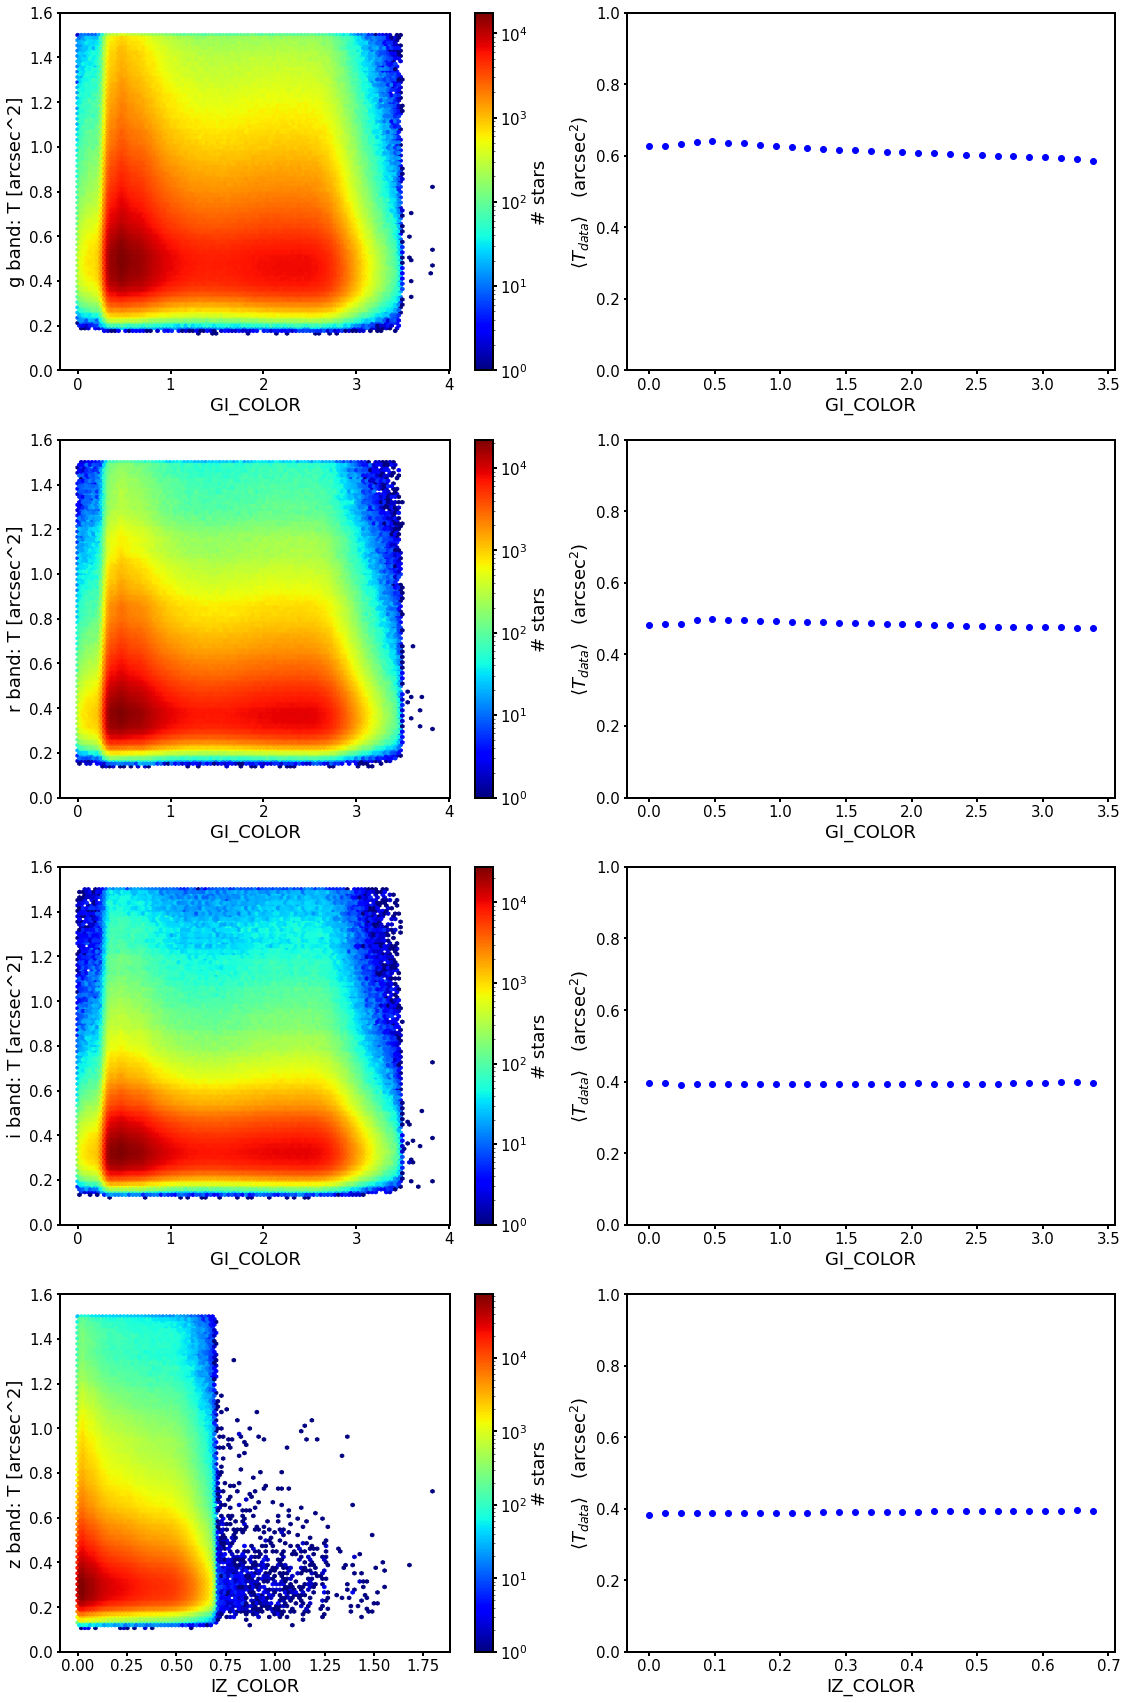

In [10]:
#plot size vs. color 2d hist and profile
# fig, axs = plt.subplots(4,2, figsize=(16,24))
# for i, band in enumerate(bands):
#     ax = axs[i][0]
#     #plot size vs color 2d hist with log density
#     if band == 'z':
#         color = 'IZ_COLOR'
#     else:
#         color = 'GI_COLOR'
#     # cat = cat[cat['T_DATA'] < 2.5]
#     chist = cat[color][cat['BAND'] == band]
#     size = cat['T_DATA'][cat['BAND'] == band]
#     cmap = plt.get_cmap('jet')
#     im = ax.hexbin(chist, size, bins='log', mincnt=1, cmap=cmap)
#     ax.set_ylim(0., 1.6)
#     ax.set_ylabel('{} band: T [arcsec^2]'.format(band))
#     ax.set_xlabel(color)
#     cbar = plt.colorbar(im, ax=ax)
#     cbar.set_label('# stars')
    
#     #plot size vs color profile
#     ax = axs[i][1]
#     nbins = 7
#     if band == 'z':
#         cmax = 0.7
#     else:
#         cmax = 3.5
#     cbins = np.linspace(0., cmax, nbins)
#     bin_by_color(chist, size, ax, cmax=cmax)

## Plotting shape residuals

### Residuals vs. color

In [6]:
def compute_res(d):
    
    de1 =  d['G1_DATA']-d['G1_MODEL']
    de2 =  d['G2_DATA']-d['G2_MODEL']
    dt =  d['T_DATA']-d['T_MODEL']
    dtfrac = dt/d['T_DATA']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt, de1, de2

In [7]:
def bin_res_by_color(m, dT, dTfrac, de1, de2, min_edge=0., max_edge=3.5):

    print(band, min_edge, max_edge)
    bins = np.linspace(min_edge, max_edge, 30)
    print('col_bins = ',bins)

    index = np.digitize(m, bins)
    #print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(bins))]
    #print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(bins))]
    #print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(bins))]
    #print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(bins))]
    #print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(bins)) ]
    #print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.
    
    return (min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac, 
            bin_dTfrac_err, bin_de1, bin_de1_err, bin_de2, bin_de2_err)

#     ax = axes[0]
#     ax.set_title('{} band'.format(band))
#     #ax.set_ylim(-0.0025,0.02)
#     ax.plot([min_mag,max_mag], [0,0], color='black')
#     #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
#     #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
#     t_line = ax.errorbar(bins[:-1], bin_dT, yerr=bin_dT_err, fmt='o', label=label)
#     #ax.axhline(y=0.003, linewidth=4, color='grey')
#     #ax.legend([t_line], [r'$\delta T$'])
#     ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

#     ax = axes[1]
#     #ax.set_ylim(-0.005,0.05)
#     ax.plot([min_mag,max_mag], [0,0], color='black')
#     #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
#     #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
#     t_line = ax.errorbar(bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, label=label, fmt='o')
#     #ax.legend([t_line], [r'$\delta T$'])
#     ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

#     ax = axes[2]
#     #ax.set_ylim(-6.e-4,6.e-4)
#     ax.plot([min_mag,max_mag], [0,0], color='black')
#     #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
#     #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
#     e1_line = ax.errorbar(bins[:-1], bin_de1, yerr=bin_de1_err, label=label, fmt='o')
#     #e2_line = ax.errorbar(bins[:-1], bin_de2, yerr=bin_de2_err, label=label, fmt='o')
#     #ax.axhline(y=0.0002, linewidth=4, color='grey')
#     #ax.axhline(y=-0.0002, linewidth=4, color='grey')
#     ax.legend()
#     # ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
#     ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
#     ax.set_xlim(min_mag,max_mag)
#     ax.set_xlabel(color)
#     plt.tight_layout()

In [8]:
def plot_bin_res(min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac, bin_dTfrac_err,
                 bin_de1, bin_de1_err, bin_de2, bin_de2_err, cutlim=None, Tlims=(-0.0075, 0.0075),
                 Tfraclims=(-0.02, 0.02), elims=(-6.e-4,6.e-4), label=None, axes=None):

    ax = axes[0]
    ax.set_title('{} band'.format(band))
    ax.set_ylim(Tlims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(bins[:-1], bin_dT, yerr=bin_dT_err, fmt='o', label=label)
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    ax.set_ylim(Tfraclims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    tfrac_line = ax.errorbar(bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, label=label, fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    ax.set_ylim(elims)
    ax.plot([min_edge,max_edge], [0,0], color='black')
    if cutlim != None:  
        ax.plot([cutlim,cutlim],[-1,1], color='Grey')
        ax.fill( [min_edge,min_edge,cutlim,cutlim], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(bins[:-1], bin_de1, yerr=bin_de1_err, label=label, fmt='o')
    #e2_line = ax.errorbar(bins[:-1], bin_de2, yerr=bin_de2_err, label=label, fmt='o')
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    #ax.legend()
    #ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_xlim(min_edge,max_edge)
    ax.set_xlabel(color)
    plt.tight_layout()

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]


No handles with labels found to put in legend.


mean de =  -2.9626101861978886e-06 -4.305611607921851e-06
mean dt =  0.00035909196877746257
r 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]


No handles with labels found to put in legend.


mean de =  2.2874254989170727e-06 -9.35742324650985e-06
mean dt =  0.00016526463896241286
i 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]


No handles with labels found to put in legend.


mean de =  -1.0030250161896e-05 -1.9060278774076313e-05
mean dt =  0.00014168516907004294
z 0.0 0.7
col_bins =  [0.         0.02413793 0.04827586 0.07241379 0.09655172 0.12068966
 0.14482759 0.16896552 0.19310345 0.21724138 0.24137931 0.26551724
 0.28965517 0.3137931  0.33793103 0.36206897 0.3862069  0.41034483
 0.43448276 0.45862069 0.48275862 0.50689655 0.53103448 0.55517241
 0.57931034 0.60344828 0.62758621 0.65172414 0.67586207 0.7       ]


No handles with labels found to put in legend.


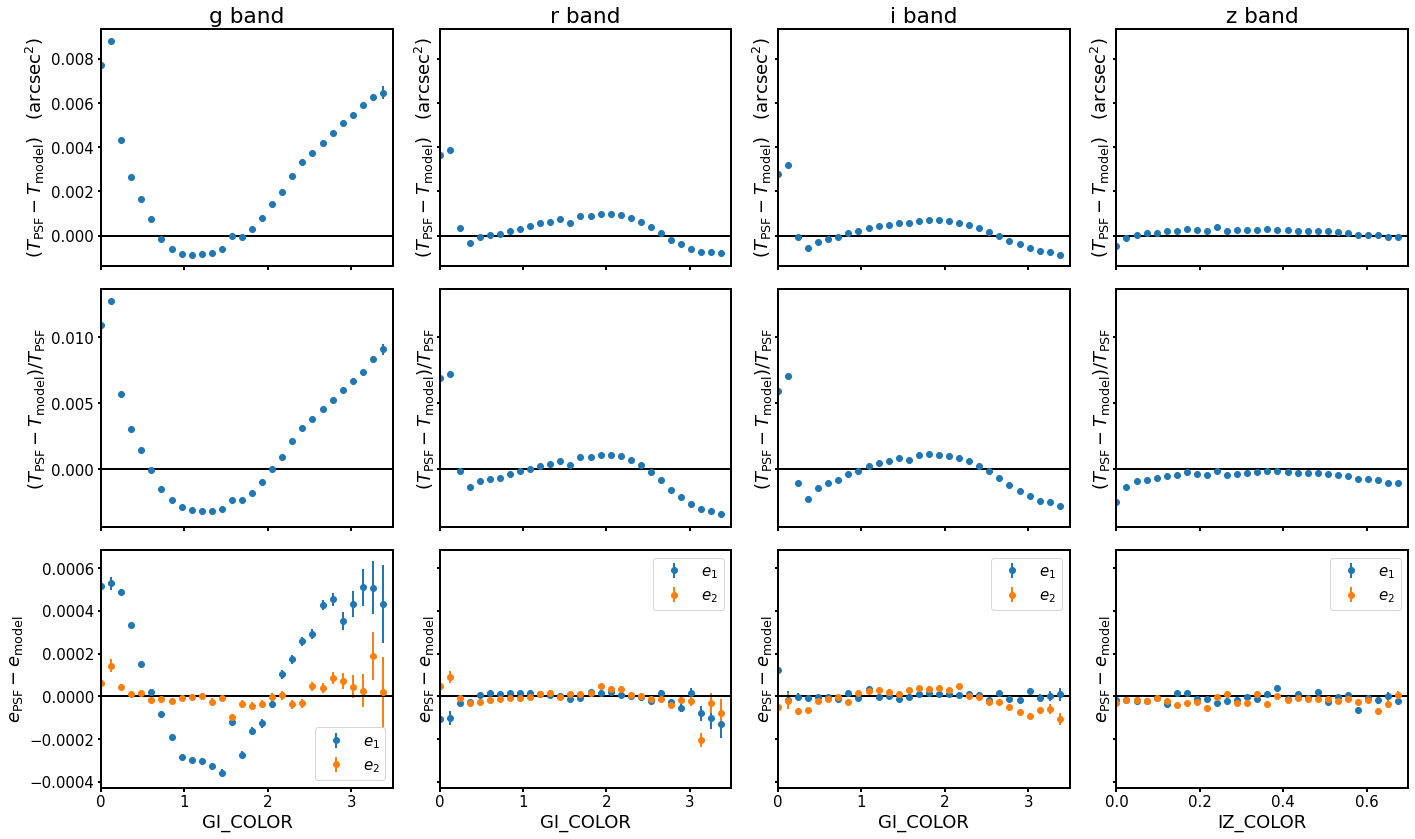

In [10]:
fig, axes = plt.subplots(3,4, figsize=(20,12), sharey='row', sharex='col')
bands = 'griz'
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    if band == 'z':
        color = 'IZ_COLOR'
        cmax = 0.7
    else:
        color = 'GI_COLOR'
        cmax = 3.5
        
    bin_res_by_color(data[color], sizeres, fracsizeres, e1res, e2res, cmax=cmax, axes=axes[:,i])

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699
Total in band g:  26878488
g 0.5 - 1.0asec:  6710314 frac:  0.24965370075876292
g 0.0 3.5
col_bins =  [0.         0.12068966 0.24137931 0.36206897 0.48275862 0.60344828
 0.72413793 0.84482759 0.96551724 1.0862069  1.20689655 1.32758621
 1.44827586 1.56896552 1.68965517 1.81034483 1.93103448 2.05172414
 2.17241379 2.29310345 2.4137931  2.53448276 2.65517241 2.77586207
 2.89655172 3.01724138 3.13793103 3.25862069 3.37931034 3.5       ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

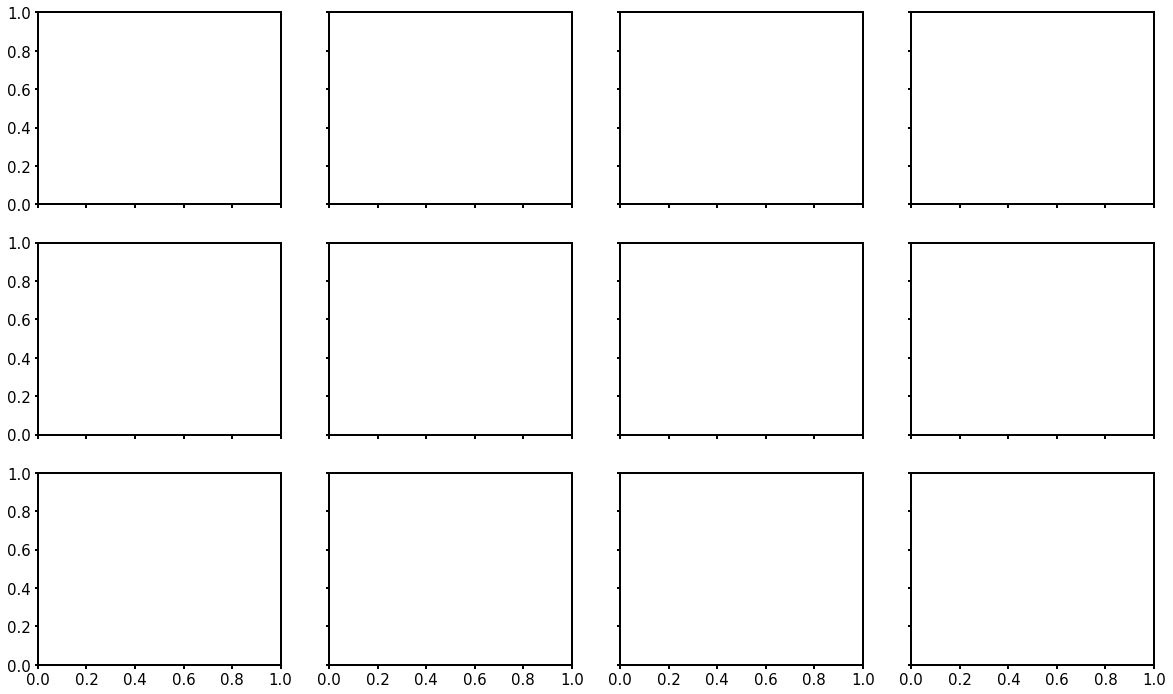

In [9]:
fig, axes = plt.subplots(3,4, figsize=(20,12), sharey='row', sharex='col')
tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
fwhmlims = [(0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    if band == 'z':
        color = 'IZ_COLOR'
        cmax = 0.7
    else:
        color = 'GI_COLOR'
        cmax = 3.5
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    # zeropt = 30.
    # mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band {}: '.format(band), len(data))
    for lims in fwhmlims:
        t_cut = np.logical_and(data['PSF_FWHM'] > lims[0], data['PSF_FWHM'] < lims[1])
        data_cut = data[t_cut]
        # mag_cut = mag[t_cut]
        fracsizeres_cut = fracsizeres[t_cut]
        sizeres_cut = sizeres[t_cut]
        e1res_cut = e1res[t_cut]
        e2res_cut = e2res[t_cut]

        print(band, '{} - {}asec: '.format(lims[0],lims[1]), len(data_cut), 'frac: ', len(data_cut)/len(data))
        (min_edge, max_edge, bins, 
         bin_dT, bin_dT_err, 
         bin_dTfrac, bin_dTfrac_err,
         bin_de1, bin_de1_err, 
         bin_de2, bin_de2_err) = bin_res_by_color(data_cut[color], sizeres_cut, fracsizeres_cut, 
                                                  e1res_cut, e2res_cut, max_edge=cmax)
        plot_bin_res(min_edge, max_edge, bins, bin_dT, bin_dT_err, bin_dTfrac,
                     bin_dTfrac_err, bin_de1, bin_de1_err, bin_de2, bin_de2_err,
                     Tlims=None, Tfraclims=None, elims=None, axes=axes)

### Residuals vs. Magnitude

In [ ]:
#plot size vs. color 2d hist and profile
fig, axs = plt.subplots(4,2, figsize=(16,24))
for i, band in enumerate(bands):
    ax = axs[i][0]
    data = cat[cat['BAND'] == band]
    #plot size vs color 2d hist with log density
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    mmin = 14.
    mmax = 30.
    mmask = np.logical_and(mag > mmin, mag < mmax)
    mag = mag[mmask]
    data = data[mmask]
    size = data['T_DATA']
    cmap = plt.get_cmap('jet')
    im = ax.hexbin(mag, size, bins='log', mincnt=1, cmap=cmap, extent=(mmin, mmax, 0., 2.5))
    ax.set_ylim(0., 2.5)
    ax.set_xlim(mmin, mmax)
    ax.set_ylabel('{} band: T [arcsec^2]'.format(band))
    ax.set_xlabel('Magnitude')
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('# stars')
    
    #plot size vs color profile
    ax = axs[i][1]
    m = mag
    dT = size
    mag_bins = np.linspace(mmin, mmax, 30)
    print('col_bins = ',mag_bins)

    index = np.digitize(mag, mag_bins)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_dT[i-1] = 0.
            bin_dT_err[i-1] = 0.
    
    ax.set_ylim(0., 1.2)
    #ax.plot([cmin,cmax], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$\left<T_{data}\right> \quad({\rm arcsec}^2)$')
    ax.set_xlabel('Magnitude')

In [7]:
def bin_by_mag(m, dT, dTfrac, de1, de2, mmin=15., mmax=21., min_mused=16.5, 
               label=None, axes=None, xlabel='Magnitude'):
    min_mag = mmin
    max_mag = mmax
    print(band, min_mag, max_mag)
    mag_bins = np.linspace(min_mag, max_mag,30)
    #print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    #print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    #print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    #print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.

    ax = axes[0]
    ax.set_title('{} band'.format(band))
    ax.set_ylim(-0.005,0.005)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    #t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='blue', fmt='o')
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, label=label, fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    ax.set_ylim(-0.02,0.02)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    #t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='blue', fmt='o')
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, label=label, fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.legend(ncol=2, columnspacing=0.5)
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    ax.set_ylim(-6.e-4,6.e-4)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.1)
    # e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='red', mfc='white', fmt='o')
    # e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='blue', fmt='o')
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, mfc='white', fmt='o', label=label)
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, fmt='o', label=label)
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    #ax.legend(ncol=2, columnspacing=0.5)
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'], loc='lower left')
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel(xlabel)
    plt.tight_layout()

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699


/tmp/ipykernel_57629/3416957456.py:7: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(data['FLUX'])


Total in band:  26878488
g 15.0 21.0


No handles with labels found to put in legend.


mean de =  -2.9626101861978886e-06 -4.305611607921851e-06
mean dt =  0.00035909196877746257
Total in band:  28156313
r 15.0 21.0


No handles with labels found to put in legend.


mean de =  2.2874254989170727e-06 -9.35742324650985e-06
mean dt =  0.00016526463896241286
Total in band:  27147571
i 15.0 21.0


No handles with labels found to put in legend.


mean de =  -1.0030250161896e-05 -1.9060278774076313e-05
mean dt =  0.00014168516907004294
Total in band:  28424135
z 15.0 21.0


No handles with labels found to put in legend.


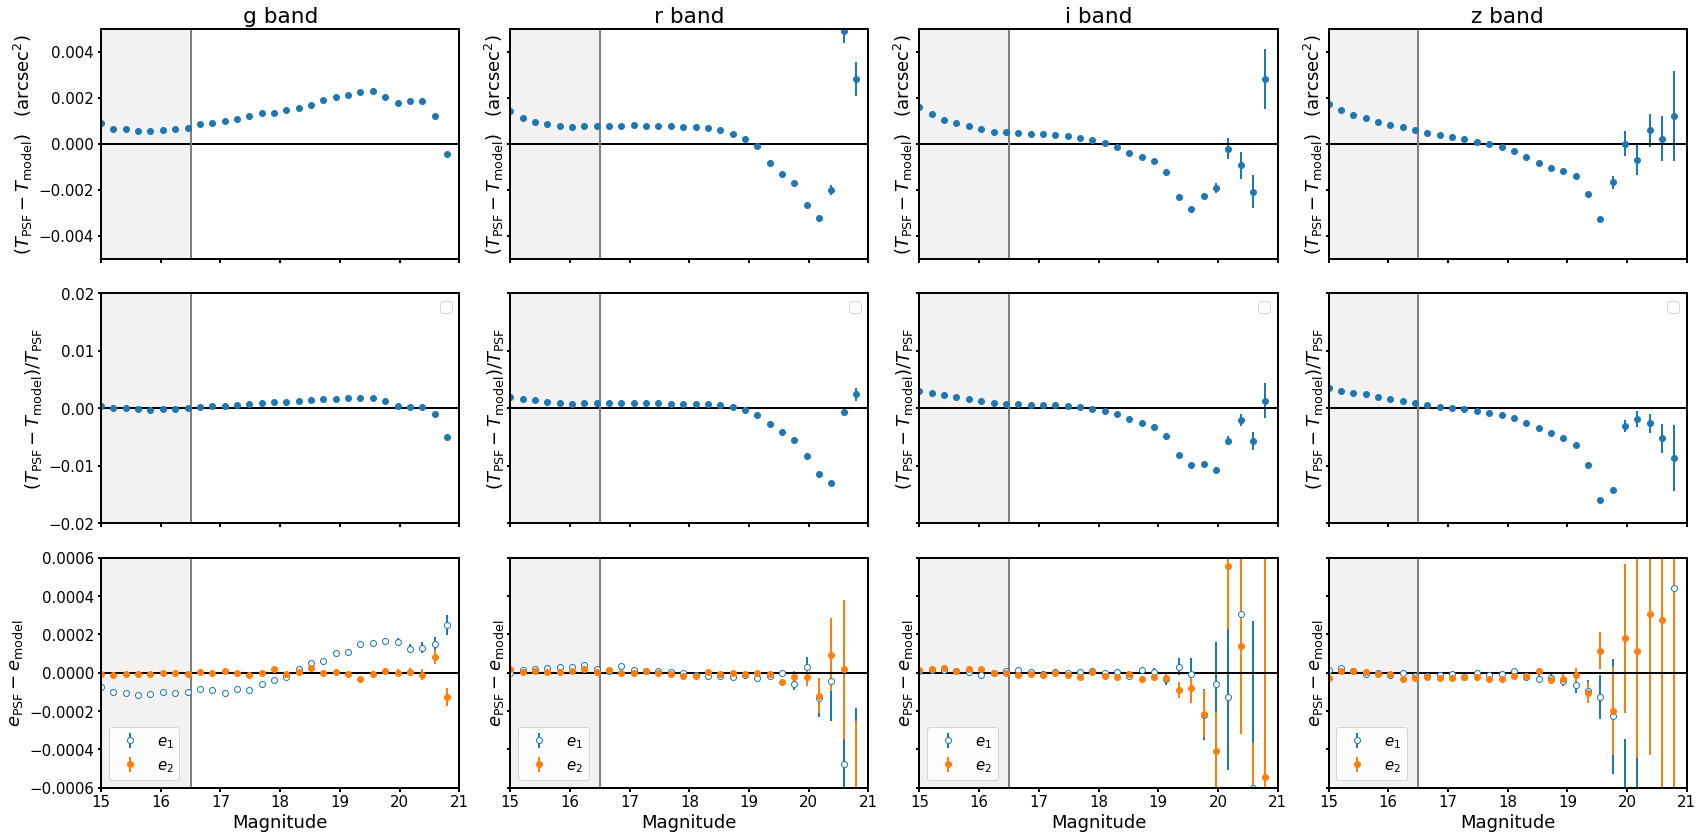

In [20]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699


/tmp/ipykernel_57629/3842910050.py:8: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(data['FLUX'])


Total in band:  26878488
g 0.5 - 1.0asec:  6710314 frac:  0.24965370075876292
g 15.0 21.0
g 1.0 - 1.5asec:  17370523 frac:  0.6462611661786928
g 15.0 21.0
g 1.5 - 2.0asec:  2657892 frac:  0.0988854730221432
g 15.0 21.0
g 2.0 - 3.0asec:  61745 frac:  0.002297190228855135
g 15.0 21.0
mean de =  -2.9626101861978886e-06 -4.305611607921851e-06
mean dt =  0.00035909196877746257
Total in band:  28156313
r 0.5 - 1.0asec:  15551619 frac:  0.5523315144280432
r 15.0 21.0
r 1.0 - 1.5asec:  11591547 frac:  0.4116855427768543
r 15.0 21.0
r 1.5 - 2.0asec:  915735 frac:  0.03252325686250185
r 15.0 21.0
r 2.0 - 3.0asec:  27246 frac:  0.0009676693109641166
r 15.0 21.0
mean de =  2.2874254989170727e-06 -9.35742324650985e-06
mean dt =  0.00016526463896241286
Total in band:  27147571
i 0.5 - 1.0asec:  20906526 frac:  0.7701066883663367
i 15.0 21.0
i 1.0 - 1.5asec:  5933827 frac:  0.21857671907368803
i 15.0 21.0
i 1.5 - 2.0asec:  260768 frac:  0.009605573920407097
i 15.0 21.0
i 2.0 - 3.0asec:  2914 frac:  0

/tmp/ipykernel_57629/1993915343.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_57629/1993915343.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_57629/1993915343.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_57629/1993915343.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_57629/1993915343.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_57629/1993915343.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_57629/1993915343.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
 

mean de =  -1.0030250161896e-05 -1.9060278774076313e-05
mean dt =  0.00014168516907004294
Total in band:  28424135
z 0.5 - 1.0asec:  21951799 frac:  0.7722943547798377
z 15.0 21.0
z 1.0 - 1.5asec:  6004594 frac:  0.21124984102418595
z 15.0 21.0
z 1.5 - 2.0asec:  420366 frac:  0.014789051628132219
z 15.0 21.0
z 2.0 - 3.0asec:  8892 frac:  0.0003128327387975043
z 15.0 21.0


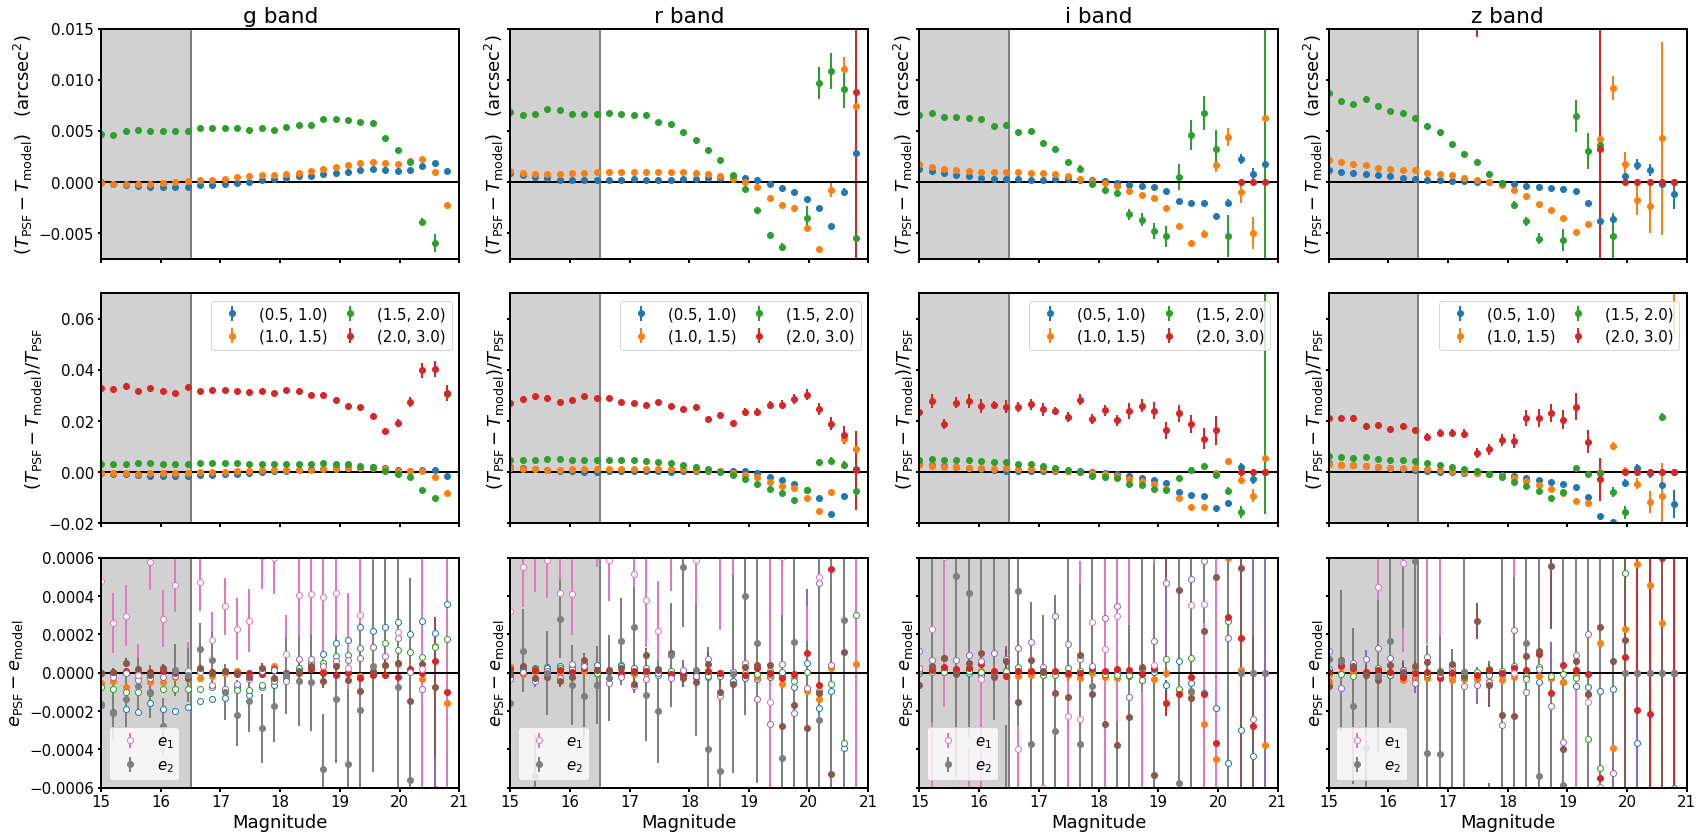

In [17]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
fwhmlims = [(0.5, 1.0), (1.0, 1.5), (1.5, 2.0), (2.0, 3.0)]
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))
    for lims in fwhmlims:
        t_cut = np.logical_and(data['PSF_FWHM'] > lims[0], data['PSF_FWHM'] < lims[1])
        mag_cut = mag[t_cut]
        fracsizeres_cut = fracsizeres[t_cut]
        sizeres_cut = sizeres[t_cut]
        e1res_cut = e1res[t_cut]
        e2res_cut = e2res[t_cut]

        print(band, '{} - {}asec: '.format(lims[0],lims[1]), len(mag_cut), 'frac: ', len(mag_cut)/len(data))
        bin_by_mag(mag_cut, sizeres_cut, fracsizeres_cut, e1res_cut, e2res_cut, axes=axes[:,i], label=str(lims))

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699
Total in band:  26878488
g 0.5 3.0


/tmp/ipykernel_4654/813188068.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/global/homes/s/schutt20/miniconda3/envs/piff-dev/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_4654/813188068.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_4654/813188068.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_4654/813188068.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_4654/813188068.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/global/homes/s/schutt20/miniconda3/envs/piff-dev/lib/pyth

mean de =  -2.9626101861978886e-06 -4.305611607921851e-06
mean dt =  0.00035909196877746257
Total in band:  28156313
r 0.5 3.0


No handles with labels found to put in legend.


mean de =  2.2874254989170727e-06 -9.35742324650985e-06
mean dt =  0.00016526463896241286
Total in band:  27147571
i 0.5 3.0


No handles with labels found to put in legend.


mean de =  -1.0030250161896e-05 -1.9060278774076313e-05
mean dt =  0.00014168516907004294
Total in band:  28424135
z 0.5 3.0


No handles with labels found to put in legend.


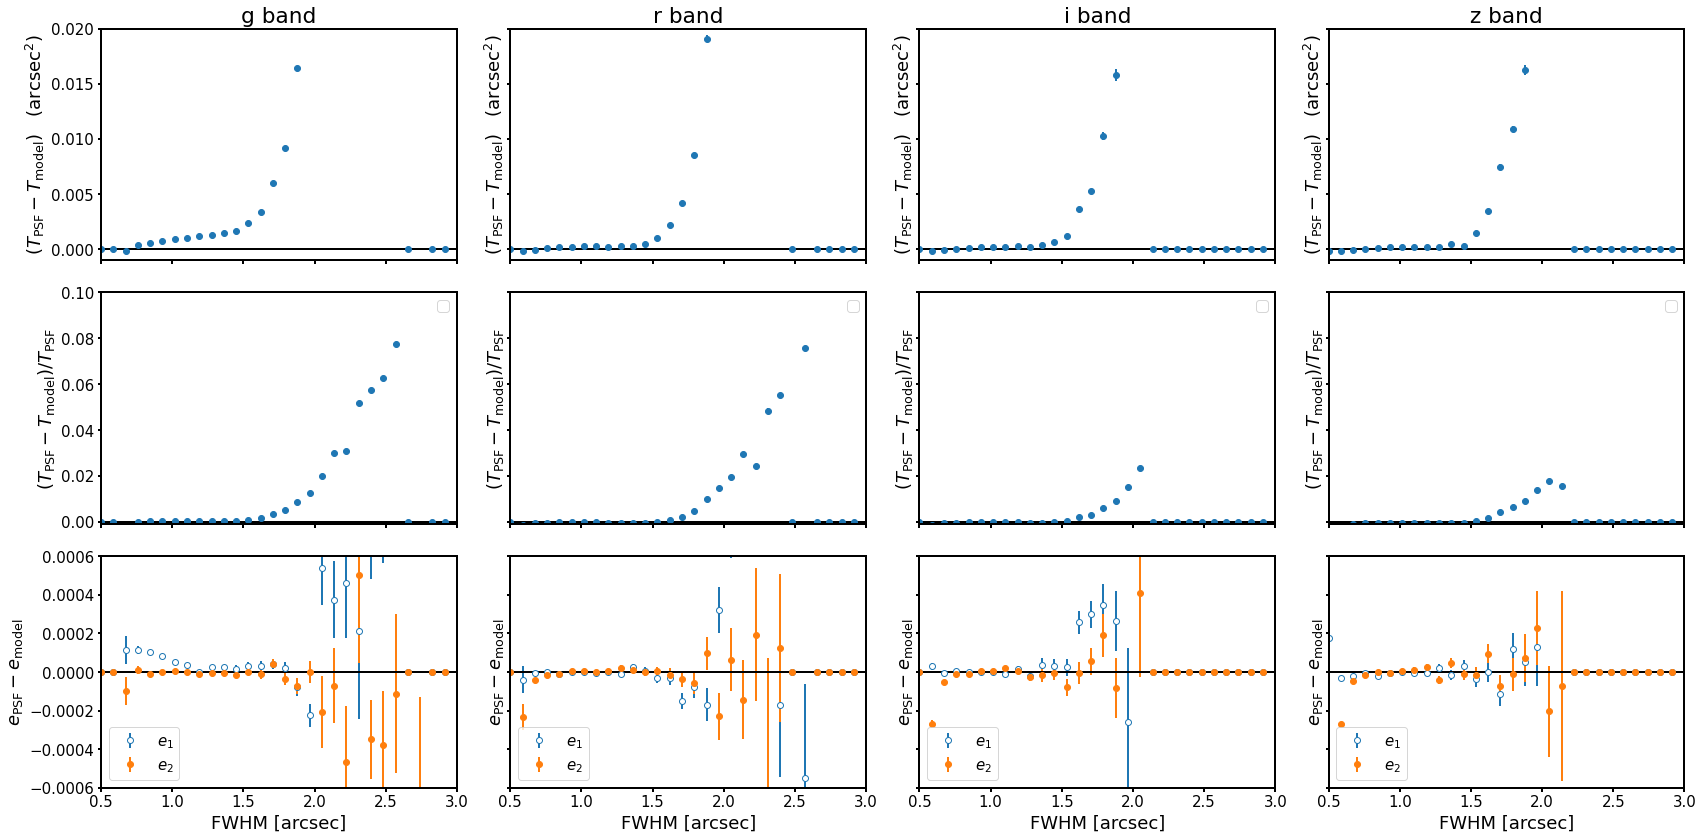

In [8]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    print('Total in band: ', len(data))

    bin_by_mag(data['PSF_FWHM'], sizeres, fracsizeres, e1res, e2res, mmin=0.5, mmax=3.0, min_mused=0, 
               axes=axes[:,i], xlabel='FWHM [arcsec]')

mean de =  4.954513152739755e-05 -3.1373658077752617e-06
mean dt =  0.0015365373318614699
Total in band:  26878488
g 0.0 3.5


/tmp/ipykernel_10658/3908194940.py:11: RuntimeWarning: Mean of empty slice.
  bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_10658/3908194940.py:13: RuntimeWarning: Mean of empty slice.
  bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_10658/3908194940.py:15: RuntimeWarning: Mean of empty slice.
  bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_10658/3908194940.py:17: RuntimeWarning: Mean of empty slice.
  bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
/tmp/ipykernel_10658/3908194940.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
/tmp/ipykernel_10658/3908194940.py:22: RuntimeWarning: Degrees of freedom <= 0 for slice
  bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
/tmp/ipykernel_10658/3908194940.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice
 

mean de =  -2.9626101861978886e-06 -4.305611607921851e-06
mean dt =  0.00035909196877746257
Total in band:  28156313
r 0.0 3.5


No handles with labels found to put in legend.


mean de =  2.2874254989170727e-06 -9.35742324650985e-06
mean dt =  0.00016526463896241286
Total in band:  27147571
i 0.0 3.5


No handles with labels found to put in legend.


mean de =  -1.0030250161896e-05 -1.9060278774076313e-05
mean dt =  0.00014168516907004294
Total in band:  28424135
z 0.0 3.5


No handles with labels found to put in legend.


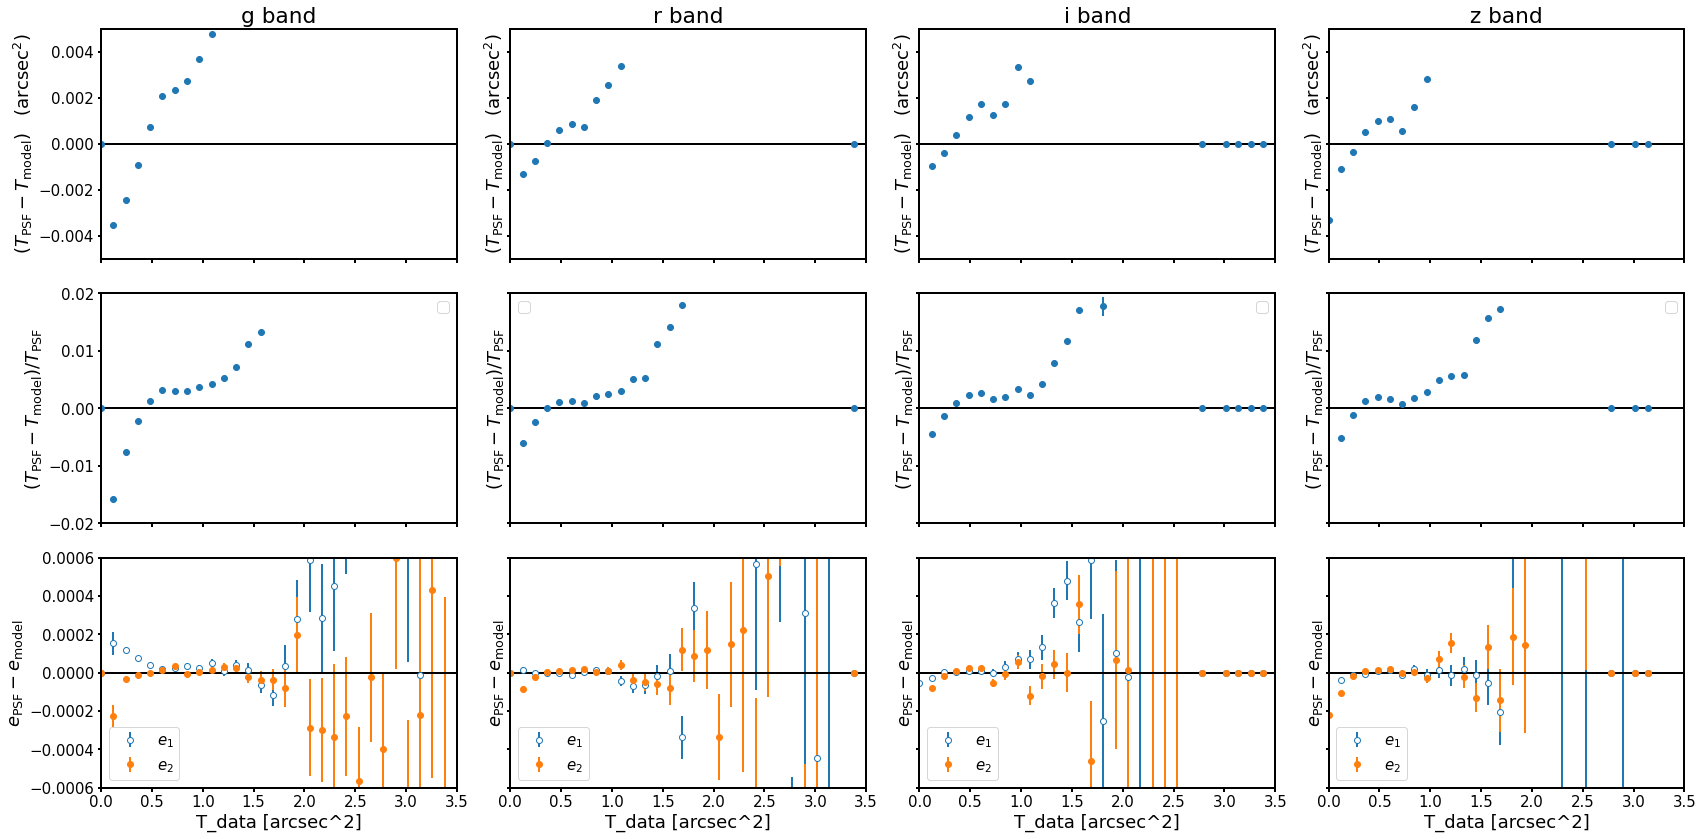

In [13]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
for i, band in enumerate(bands):
    data = cat[cat['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    print('Total in band: ', len(data))

    bin_by_mag(data['T_DATA'], sizeres, fracsizeres, e1res, e2res, mmin=0., mmax=3.5, min_mused=0,
               axes=axes[:,i], xlabel='T_data [arcsec^2]')

### cutting FWHM>1.5asec

In [ ]:
cat2 = cat[cat['PSF_FWHM'] < 1.5]

mean de =  5.1963442450888e-05 -2.4730372338068164e-06
mean dt =  0.0009632010074314296


/tmp/ipykernel_53505/3416957456.py:7: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(data['FLUX'])


Total in band:  24141683
g 15.0 21.0


No handles with labels found to put in legend.


mean de =  -2.4487584631639275e-06 -4.018520388956751e-06
mean dt =  0.00020114062893551498
Total in band:  27210801
r 15.0 21.0


No handles with labels found to put in legend.


mean de =  8.376665693353881e-07 -9.113211328349357e-06
mean dt =  0.00013029793864723852
Total in band:  26883889
i 15.0 21.0


No handles with labels found to put in legend.


mean de =  -1.0283044271486979e-05 -1.957886653433303e-05
mean dt =  7.664963058062209e-05
Total in band:  27988928
z 15.0 21.0


No handles with labels found to put in legend.


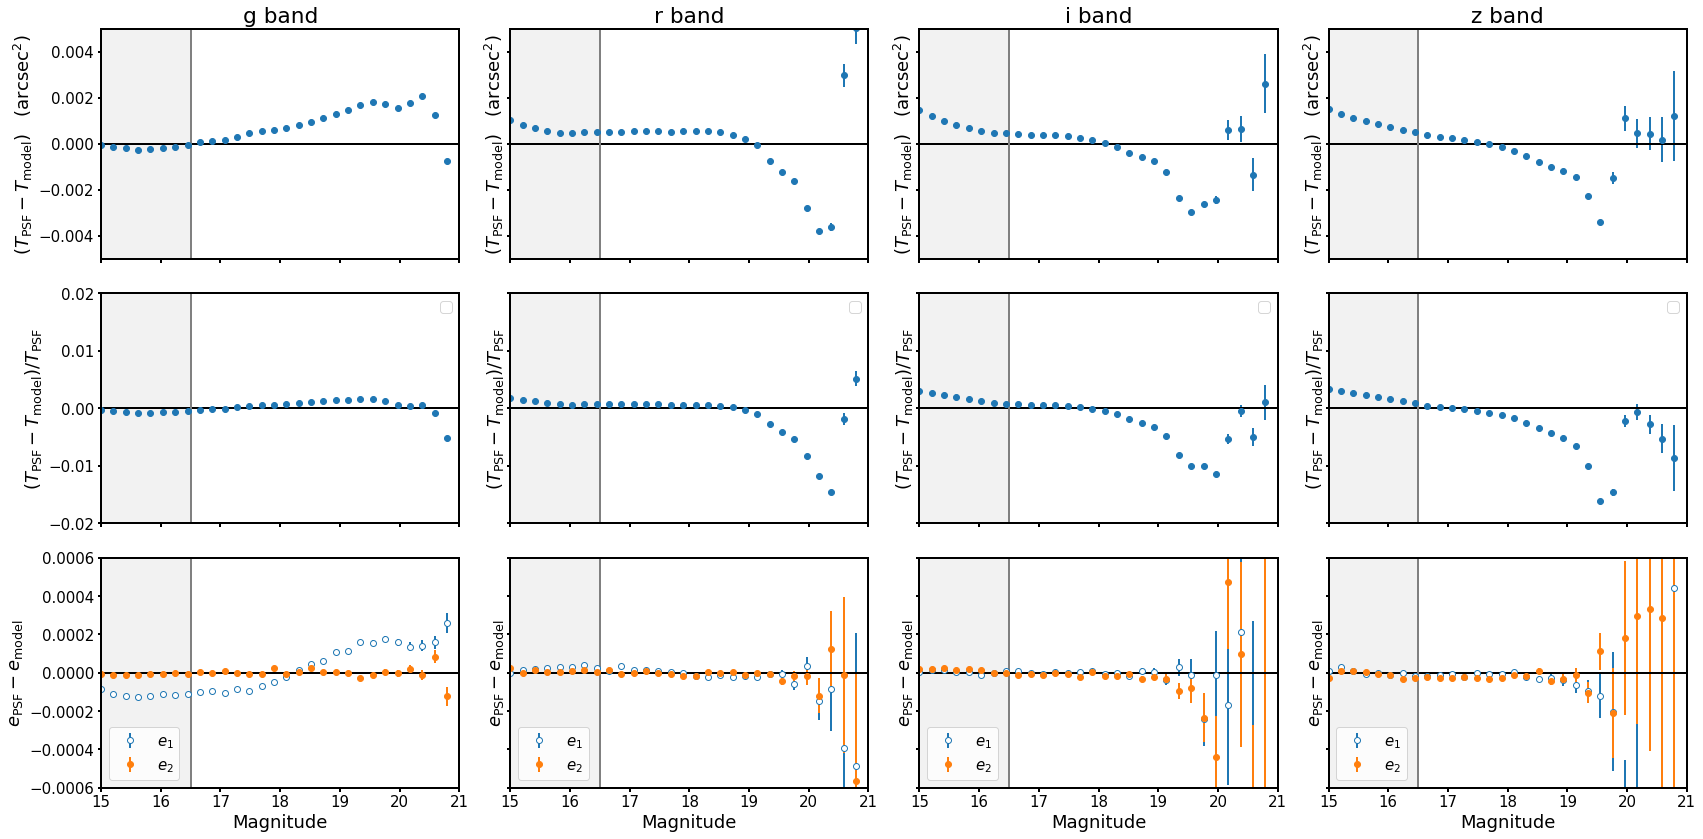

In [12]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat2[cat2['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])

### cutting T>1.5asec^2

In [8]:
cat2 = cat[cat['T_DATA'] < 1.5]

mean de =  4.985709923124471e-05 -2.314524173607268e-06
mean dt =  0.0009867845910006138


/tmp/ipykernel_10705/3416957456.py:7: RuntimeWarning: invalid value encountered in log10
  mag = zeropt - 2.5*np.log10(data['FLUX'])


Total in band:  26460429
g 15.0 21.0


No handles with labels found to put in legend.


mean de =  -3.426057539287591e-06 -4.2186491545628084e-06
mean dt =  0.000201670613198725
Total in band:  28036540
r 15.0 21.0


No handles with labels found to put in legend.


mean de =  1.923385639105385e-06 -9.436329187638339e-06
mean dt =  0.00013903503488109796
Total in band:  27124581
i 15.0 21.0


No handles with labels found to put in legend.


mean de =  -1.0282185210987933e-05 -1.9044449761310632e-05
mean dt =  8.677578251877659e-05
Total in band:  28373208
z 15.0 21.0


No handles with labels found to put in legend.


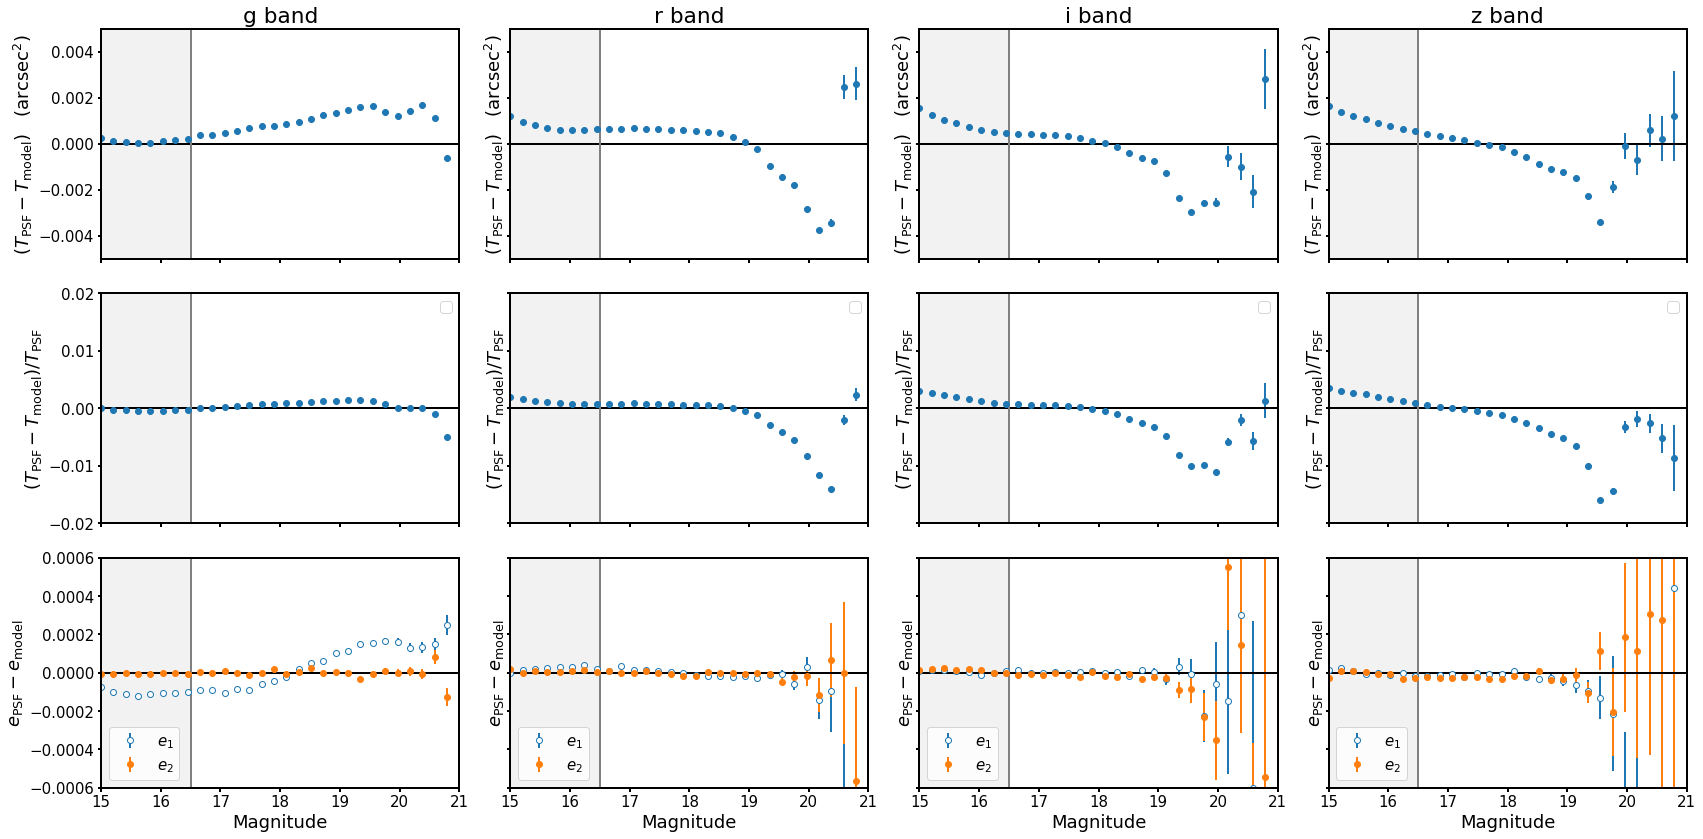

In [9]:
fig, axes = plt.subplots(3,4, figsize=(24,12), sharey='row', sharex='col')
# tlims = [(0,0.6), (0.6,1.0), (1.0, 1.5), (1.5, 2.5)]
for i, band in enumerate(bands):
    data = cat2[cat2['BAND'] == band]
    fracsizeres, sizeres, e1res, e2res = compute_res(data)
    zeropt = 30.
    mag = zeropt - 2.5*np.log10(data['FLUX'])
    print('Total in band: ', len(data))

    bin_by_mag(mag, sizeres, fracsizeres, e1res, e2res, axes=axes[:,i])